In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [4]:
# Load the data
file_path_final = 'goal_amount.csv'
data = pd.read_csv(file_path_final)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   years_to_retire          50000 non-null  int64  
 1   location                 50000 non-null  object 
 2   salary                   50000 non-null  int64  
 3   investment_amount        50000 non-null  int64  
 4   current_savings          50000 non-null  int64  
 5   debt                     50000 non-null  int64  
 6   other_expenses           50000 non-null  int64  
 7   number_of_dependents     50000 non-null  int64  
 8   current_invested_amount  50000 non-null  int64  
 9   house_ownership          50000 non-null  object 
 10  s1_low                   50000 non-null  int64  
 11  s2_low                   50000 non-null  int64  
 12  s3_low                   50000 non-null  int64  
 13  s4_low                   50000 non-null  int64  
 14  s5_low                

In [6]:
columns_to_drop = ['salary', 'debt', 'other_expenses', 'number_of_dependents', 'house_ownership']
data.drop(columns_to_drop, inplace=True, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   years_to_retire          50000 non-null  int64  
 1   location                 50000 non-null  object 
 2   investment_amount        50000 non-null  int64  
 3   current_savings          50000 non-null  int64  
 4   current_invested_amount  50000 non-null  int64  
 5   s1_low                   50000 non-null  int64  
 6   s2_low                   50000 non-null  int64  
 7   s3_low                   50000 non-null  int64  
 8   s4_low                   50000 non-null  int64  
 9   s5_low                   50000 non-null  int64  
 10  s6_low                   50000 non-null  int64  
 11  s1_mid                   50000 non-null  int64  
 12  s2_mid                   50000 non-null  int64  
 13  s3_mid                   50000 non-null  int64  
 14  s4_mid                

In [8]:
df = pd.DataFrame(data)
df = df[df['investment_amount'] != 0]
df

,years_to_retire,location,investment_amount,current_savings,current_invested_amount,s1_low,s2_low,s3_low,s4_low,s5_low,...,s6_mid,s1_high,s2_high,s3_high,s4_high,s5_high,s6_high,goal_low,goal_mid,goal_high
2,12,Chennai,18725,1339139,691978,5,3,28,17,42,...,27,32,28,6,6,4,24,3.784396e+06,4.085009e+06,5.010563e+06
3,25,Pune,17375,664623,324632,14,3,21,18,36,...,32,36,25,6,6,3,24,1.238790e+07,1.455678e+07,2.413228e+07
4,23,Bangalore,35500,1463199,733991,4,1,26,16,44,...,33,41,27,9,7,1,15,1.879909e+07,2.283112e+07,4.038637e+07
6,15,Hyderabad,14819,2281321,1397582,6,4,28,16,40,...,26,37,30,8,7,0,18,4.198934e+06,4.590772e+06,6.200842e+06
7,15,Mumbai,9641,1236218,1000458,6,4,28,19,38,...,32,34,26,7,7,3,23,2.742651e+06,3.024776e+06,3.850533e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,16,Delhi,21992,1391306,757185,16,4,21,15,37,...,25,36,29,9,5,2,19,7.104821e+06,7.317121e+06,1.037332e+07
49996,22,Lucknow,55595,1689806,1063342,12,3,27,17,35,...,29,28,34,8,8,4,18,3.036526e+07,3.404687e+07,6.011219e+07
49997,38,Hyderabad,58017,6019,0,5,2,26,19,38,...,31,18,32,8,9,14,19,1.064041e+08,2.018105e+08,4.969072e+08
49998,7,Delhi,12257,490652,240204,12,3,26,16,36,...,28,35,27,8,7,6,17,1.255843e+06,1.276648e+06,1.435749e+06


In [36]:
data = data[data['investment_amount'] != 0]
data

,years_to_retire,location,investment_amount,current_savings,current_invested_amount,s1_low,s2_low,s3_low,s4_low,s5_low,...,s6_mid,s1_high,s2_high,s3_high,s4_high,s5_high,s6_high,goal_low,goal_mid,goal_high
2,12,Chennai,18725,1339139,691978,5,3,28,17,42,...,27,32,28,6,6,4,24,"3,784,396.29","4,085,008.74","5,010,563.07"
3,25,Pune,17375,664623,324632,14,3,21,18,36,...,32,36,25,6,6,3,24,"12,387,905.00","14,556,777.75","24,132,282.45"
4,23,Bangalore,35500,1463199,733991,4,1,26,16,44,...,33,41,27,9,7,1,15,"18,799,085.86","22,831,124.54","40,386,372.31"
6,15,Hyderabad,14819,2281321,1397582,6,4,28,16,40,...,26,37,30,8,7,0,18,"4,198,933.92","4,590,771.61","6,200,841.69"
7,15,Mumbai,9641,1236218,1000458,6,4,28,19,38,...,32,34,26,7,7,3,23,"2,742,651.01","3,024,775.55","3,850,533.07"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,16,Delhi,21992,1391306,757185,16,4,21,15,37,...,25,36,29,9,5,2,19,"7,104,821.42","7,317,120.61","10,373,320.34"
49996,22,Lucknow,55595,1689806,1063342,12,3,27,17,35,...,29,28,34,8,8,4,18,"30,365,262.88","34,046,873.98","60,112,186.59"
49997,38,Hyderabad,58017,123562,50152,5,2,26,19,38,...,31,18,32,8,9,14,19,"106,404,111.82","201,810,469.49","496,907,202.77"
49998,7,Delhi,12257,490652,240204,12,3,26,16,36,...,28,35,27,8,7,6,17,"1,255,843.02","1,276,647.59","1,435,749.26"


In [37]:
# Clipping outliers
def clip_outliers(data, column, lower_quantile=0.05, upper_quantile=0.95):
    lower_bound = data[column].quantile(lower_quantile)
    upper_bound = data[column].quantile(upper_quantile)
    data[column] = np.clip(data[column], lower_bound, upper_bound)

columns_to_clip = ['current_savings', 'current_invested_amount', 'investment_amount']
for column in columns_to_clip:
    clip_outliers(data, column)


In [38]:
# Preprocessing
def preprocess_data(data):
    # Encode categorical variables
    label_encoders = {}
    for column in data.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le
    
    # Select specified features and target
    targets = data[['goal_low', 'goal_mid', 'goal_high']]
    features = data.drop(columns=['goal_low', 'goal_mid', 'goal_high'])
    
    # Scale features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    
    return features_scaled, targets, scaler, label_encoders

features_scaled, targets, scaler, label_encoders = preprocess_data(data)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, targets, test_size=0.2, random_state=42)


In [39]:
# Build the neural network model
def build_model(input_dim, units=128, dropout_rate=0.3, l2_reg=0.01, learning_rate=0.001):
    model = Sequential([
        Dense(units, input_dim=input_dim, activation='relu', kernel_initializer=HeNormal(), kernel_regularizer=l2(l2_reg)),
        Dropout(dropout_rate),
        Dense(units // 2, activation='relu', kernel_initializer=HeNormal(), kernel_regularizer=l2(l2_reg)),
        Dropout(dropout_rate),
        Dense(units // 4, activation='relu', kernel_initializer=HeNormal(), kernel_regularizer=l2(l2_reg)),
        Dense(3, activation='relu', kernel_regularizer=l2(l2_reg))  # Output layer for three goals: goal_low, goal_mid, goal_high
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Wrap the model with KerasRegressor
regressor = KerasRegressor(
    model=build_model,
    input_dim=X_train.shape[1],
    verbose=1
)

In [40]:
# Define the parameter grid
param_grid = {
    'model__units': [32, 64, 128, 256],
    'model__dropout_rate': [0.3, 0.5],
    'epochs': [100, 150],
    'batch_size': [500, 1000, 2000]
}

# Perform grid search
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequen

Epoch 1/100
Epoch 1/100
Epoch 1/100


/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequen

Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4301391493332992.0000 
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4475236737089536.0000
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4540703312969728.0000   
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4570521123422208.0000
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4577829547147264.0000
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4471602657886208.0000
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4372381397155840.0000   
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4364138549608448.0000
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4279302744965120.0000 
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4642692680122368.0000 
26/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4442293264187392.0000   Epoch 3/100
41

KeyboardInterrupt: 

In [50]:
# Print the best parameters and results
print(f"Best: {grid_search.best_score_} using {grid_search.best_params_}")

Best: -209505167502493.4 using {'batch_size': 500, 'epochs': 150, 'model__dropout_rate': 0.3, 'model__units': 256}


In [41]:
print(X_train[:5])  # Check the first 5 rows of the scaled features
print(X_test[:5])   # Check the first 5 rows of the scaled test features


[[-1.79148792e-01 -1.52549816e+00  2.11759665e+00  3.64351511e-01
   4.14945673e-01  2.61204819e-01 -7.19796213e-01 -5.11059691e-01
  -7.03923560e-01  1.70907722e-01  5.23247872e-01  2.79931242e-01
   7.07536878e-01 -1.22112608e+00 -1.22683025e+00  1.21584539e+00
   1.72986183e-01 -9.70209947e-01  1.57331379e+00 -1.41158706e+00
   1.41601724e+00  6.91464937e-01 -5.15141378e-01]
 [ 3.33073658e-01  6.53185455e-01 -5.95863929e-01  7.95947568e-02
  -2.50825699e-01 -1.33710384e+00  1.40610614e+00  1.84527667e-01
   4.42942554e-03  5.19539240e-01  8.71036754e-01 -9.42991954e-01
  -1.41619443e+00 -8.72515424e-01  1.21779101e+00  1.70694313e-01
   1.56676792e+00  1.61182766e+00 -5.19437789e-01 -1.41158706e+00
  -1.41590516e+00 -7.00807734e-01 -5.15141378e-01]
 [-1.79148792e-01 -6.54024714e-01  2.11759665e+00  2.37491770e+00
   2.40487450e+00 -1.38372346e-01  1.40610614e+00 -5.11059691e-01
  -7.03923560e-01  8.68170757e-01 -5.20118773e-01  2.11431604e+00
   7.07536878e-01 -1.56973674e+00 -8.775

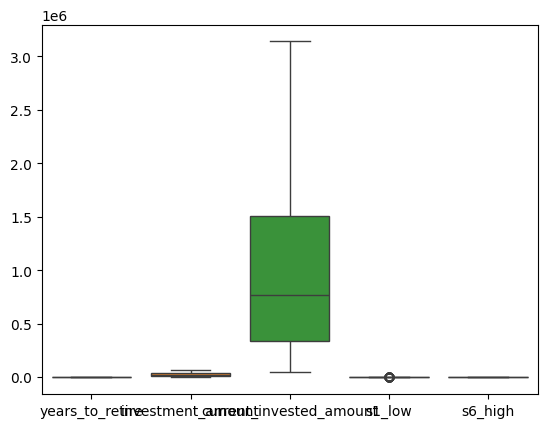

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=data[['years_to_retire', 'investment_amount', 'current_invested_amount', 'investment_amount', 's1_low', 's6_high']])
plt.show()


In [13]:
data.head(5)

,years_to_retire,location,investment_amount,current_savings,current_invested_amount,s1_low,s2_low,s3_low,s4_low,s5_low,...,s6_mid,s1_high,s2_high,s3_high,s4_high,s5_high,s6_high,goal_low,goal_mid,goal_high
2,12,Chennai,18725,1339139,691978,5,3,28,17,42,...,27,32,28,6,6,4,24,3.784396e+06,4.085009e+06,5.010563e+06
3,25,Pune,17375,664623,324632,14,3,21,18,36,...,32,36,25,6,6,3,24,1.238790e+07,1.455678e+07,2.413228e+07
4,23,Bangalore,35500,1463199,733991,4,1,26,16,44,...,33,41,27,9,7,1,15,1.879909e+07,2.283112e+07,4.038637e+07
6,15,Hyderabad,14819,2281321,1397582,6,4,28,16,40,...,26,37,30,8,7,0,18,4.198934e+06,4.590772e+06,6.200842e+06
7,15,Mumbai,9641,1236218,1000458,6,4,28,19,38,...,32,34,26,7,7,3,23,2.742651e+06,3.024776e+06,3.850533e+06


In [26]:
data['goal_low'] = data['goal_low'].map('{:,.2f}'.format)
data['goal_mid'] = data['goal_mid'].map('{:,.2f}'.format)
data['goal_high'] = data['goal_high'].map('{:,.2f}'.format)
data

/var/folders/0b/tbcb989n38q5j2gz3d4zcx680000gn/T/ipykernel_4210/276779360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['goal_low'] = data['goal_low'].map('{:,.2f}'.format)
/var/folders/0b/tbcb989n38q5j2gz3d4zcx680000gn/T/ipykernel_4210/276779360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['goal_mid'] = data['goal_mid'].map('{:,.2f}'.format)
/var/folders/0b/tbcb989n38q5j2gz3d4zcx680000gn/T/ipykernel_4210/276779360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,years_to_retire,location,investment_amount,current_savings,current_invested_amount,s1_low,s2_low,s3_low,s4_low,s5_low,...,s6_mid,s1_high,s2_high,s3_high,s4_high,s5_high,s6_high,goal_low,goal_mid,goal_high
2,12,Chennai,18725,1339139,691978,5,3,28,17,42,...,27,32,28,6,6,4,24,"3,784,396.29","4,085,008.74","5,010,563.07"
3,25,Pune,17375,664623,324632,14,3,21,18,36,...,32,36,25,6,6,3,24,"12,387,905.00","14,556,777.75","24,132,282.45"
4,23,Bangalore,35500,1463199,733991,4,1,26,16,44,...,33,41,27,9,7,1,15,"18,799,085.86","22,831,124.54","40,386,372.31"
6,15,Hyderabad,14819,2281321,1397582,6,4,28,16,40,...,26,37,30,8,7,0,18,"4,198,933.92","4,590,771.61","6,200,841.69"
7,15,Mumbai,9641,1236218,1000458,6,4,28,19,38,...,32,34,26,7,7,3,23,"2,742,651.01","3,024,775.55","3,850,533.07"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,16,Delhi,21992,1391306,757185,16,4,21,15,37,...,25,36,29,9,5,2,19,"7,104,821.42","7,317,120.61","10,373,320.34"
49996,22,Lucknow,55595,1689806,1063342,12,3,27,17,35,...,29,28,34,8,8,4,18,"30,365,262.88","34,046,873.98","60,112,186.59"
49997,38,Hyderabad,58017,123562,50152,5,2,26,19,38,...,31,18,32,8,9,14,19,"106,404,111.82","201,810,469.49","496,907,202.77"
49998,7,Delhi,12257,490652,240204,12,3,26,16,36,...,28,35,27,8,7,6,17,"1,255,843.02","1,276,647.59","1,435,749.26"


In [29]:
data['goal_low'] = data['goal_low'].replace(',','',regex=True)
data['goal_mid'] = data['goal_mid'].replace(',','',regex=True)
data['goal_high'] = data['goal_high'].replace(',','',regex=True)
data

/var/folders/0b/tbcb989n38q5j2gz3d4zcx680000gn/T/ipykernel_4210/1039547939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['goal_low'] = data['goal_low'].replace(',','',regex=True)
/var/folders/0b/tbcb989n38q5j2gz3d4zcx680000gn/T/ipykernel_4210/1039547939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['goal_mid'] = data['goal_mid'].replace(',','',regex=True)
/var/folders/0b/tbcb989n38q5j2gz3d4zcx680000gn/T/ipykernel_4210/1039547939.py:3: SettingWithCopyWarning: 
A value is trying to be se

,years_to_retire,location,investment_amount,current_savings,current_invested_amount,s1_low,s2_low,s3_low,s4_low,s5_low,...,s6_mid,s1_high,s2_high,s3_high,s4_high,s5_high,s6_high,goal_low,goal_mid,goal_high
2,12,Chennai,18725,1339139,691978,5,3,28,17,42,...,27,32,28,6,6,4,24,3784396.29,4085008.74,5010563.07
3,25,Pune,17375,664623,324632,14,3,21,18,36,...,32,36,25,6,6,3,24,12387905.00,14556777.75,24132282.45
4,23,Bangalore,35500,1463199,733991,4,1,26,16,44,...,33,41,27,9,7,1,15,18799085.86,22831124.54,40386372.31
6,15,Hyderabad,14819,2281321,1397582,6,4,28,16,40,...,26,37,30,8,7,0,18,4198933.92,4590771.61,6200841.69
7,15,Mumbai,9641,1236218,1000458,6,4,28,19,38,...,32,34,26,7,7,3,23,2742651.01,3024775.55,3850533.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,16,Delhi,21992,1391306,757185,16,4,21,15,37,...,25,36,29,9,5,2,19,7104821.42,7317120.61,10373320.34
49996,22,Lucknow,55595,1689806,1063342,12,3,27,17,35,...,29,28,34,8,8,4,18,30365262.88,34046873.98,60112186.59
49997,38,Hyderabad,58017,123562,50152,5,2,26,19,38,...,31,18,32,8,9,14,19,106404111.82,201810469.49,496907202.77
49998,7,Delhi,12257,490652,240204,12,3,26,16,36,...,28,35,27,8,7,6,17,1255843.02,1276647.59,1435749.26


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37901 entries, 2 to 49999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   years_to_retire          37901 non-null  int64  
 1   location                 37901 non-null  object 
 2   investment_amount        37901 non-null  int64  
 3   current_savings          37901 non-null  int64  
 4   current_invested_amount  37901 non-null  int64  
 5   s1_low                   37901 non-null  int64  
 6   s2_low                   37901 non-null  int64  
 7   s3_low                   37901 non-null  int64  
 8   s4_low                   37901 non-null  int64  
 9   s5_low                   37901 non-null  int64  
 10  s6_low                   37901 non-null  int64  
 11  s1_mid                   37901 non-null  int64  
 12  s2_mid                   37901 non-null  int64  
 13  s3_mid                   37901 non-null  int64  
 14  s4_mid                   37

In [31]:
data['goal_low'] = pd.to_numeric(data['goal_low'])
data['goal_mid'] = pd.to_numeric(data['goal_mid'])
data['goal_high'] = pd.to_numeric(data['goal_high'])
data

/var/folders/0b/tbcb989n38q5j2gz3d4zcx680000gn/T/ipykernel_4210/841262496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['goal_low'] = pd.to_numeric(data['goal_low'])
/var/folders/0b/tbcb989n38q5j2gz3d4zcx680000gn/T/ipykernel_4210/841262496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['goal_mid'] = pd.to_numeric(data['goal_mid'])
/var/folders/0b/tbcb989n38q5j2gz3d4zcx680000gn/T/ipykernel_4210/841262496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,years_to_retire,location,investment_amount,current_savings,current_invested_amount,s1_low,s2_low,s3_low,s4_low,s5_low,...,s6_mid,s1_high,s2_high,s3_high,s4_high,s5_high,s6_high,goal_low,goal_mid,goal_high
2,12,Chennai,18725,1339139,691978,5,3,28,17,42,...,27,32,28,6,6,4,24,3.784396e+06,4.085009e+06,5.010563e+06
3,25,Pune,17375,664623,324632,14,3,21,18,36,...,32,36,25,6,6,3,24,1.238790e+07,1.455678e+07,2.413228e+07
4,23,Bangalore,35500,1463199,733991,4,1,26,16,44,...,33,41,27,9,7,1,15,1.879909e+07,2.283112e+07,4.038637e+07
6,15,Hyderabad,14819,2281321,1397582,6,4,28,16,40,...,26,37,30,8,7,0,18,4.198934e+06,4.590772e+06,6.200842e+06
7,15,Mumbai,9641,1236218,1000458,6,4,28,19,38,...,32,34,26,7,7,3,23,2.742651e+06,3.024776e+06,3.850533e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,16,Delhi,21992,1391306,757185,16,4,21,15,37,...,25,36,29,9,5,2,19,7.104821e+06,7.317121e+06,1.037332e+07
49996,22,Lucknow,55595,1689806,1063342,12,3,27,17,35,...,29,28,34,8,8,4,18,3.036526e+07,3.404687e+07,6.011219e+07
49997,38,Hyderabad,58017,123562,50152,5,2,26,19,38,...,31,18,32,8,9,14,19,1.064041e+08,2.018105e+08,4.969072e+08
49998,7,Delhi,12257,490652,240204,12,3,26,16,36,...,28,35,27,8,7,6,17,1.255843e+06,1.276648e+06,1.435749e+06


In [34]:
data['goal_high']

2         5,010,563.07
3        24,132,282.45
4        40,386,372.31
6         6,200,841.69
7         3,850,533.07
             ...      
49995    10,373,320.34
49996    60,112,186.59
49997   496,907,202.77
49998     1,435,749.26
49999     4,464,884.66
Name: goal_high, Length: 37901, dtype: float64

In [33]:
pd.options.display.float_format = '{:,.2f}'.format

In [50]:
from sklearn.ensemble import RandomForestRegressor


In [54]:
# Select specified features for RandomForestRegressor training
features = data[['years_to_retire', 'investment_amount', 's1_high', 's4_mid']]

# Fit a RandomForestRegressor to identify feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(features, targets)




RandomForestRegressor(random_state=42)

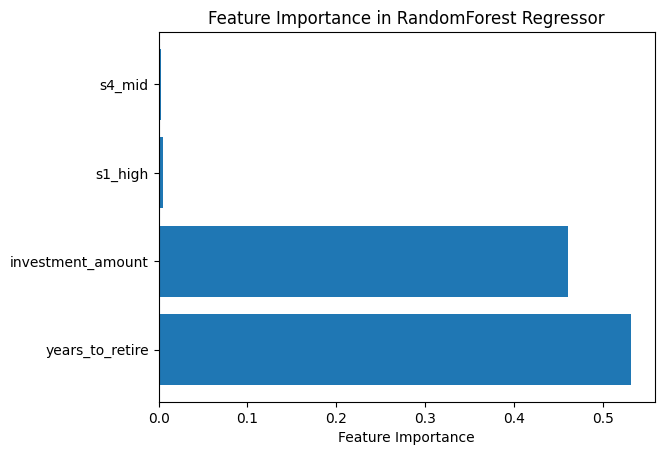

In [56]:
# Plot feature importances
importances = rf.feature_importances_
feature_names = ['years_to_retire', 'investment_amount', 's1_high', 's4_mid']
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in RandomForest Regressor')
plt.show()

In [59]:
data.drop(columns=['location', 'current_savings', 'current_invested_amount'], inplace=True, axis=1)
data.head(5)

,years_to_retire,investment_amount,s1_low,s2_low,s3_low,s4_low,s5_low,s6_low,s1_mid,s2_mid,...,s6_mid,s1_high,s2_high,s3_high,s4_high,s5_high,s6_high,goal_low,goal_mid,goal_high
2,12,18725,5,3,28,17,42,5,19,6,...,27,32,28,6,6,4,24,"3,784,396.29","4,085,008.74","5,010,563.07"
3,25,17375,14,3,21,18,36,8,0,8,...,32,36,25,6,6,3,24,"12,387,905.00","14,556,777.75","24,132,282.45"
4,23,35500,4,1,26,16,44,9,4,6,...,33,41,27,9,7,1,15,"18,799,085.86","22,831,124.54","40,386,372.31"
6,15,14819,6,4,28,16,40,6,6,9,...,26,37,30,8,7,0,18,"4,198,933.92","4,590,771.61","6,200,841.69"
7,15,9641,6,4,28,19,38,5,10,9,...,32,34,26,7,7,3,23,"2,742,651.01","3,024,775.55","3,850,533.07"


In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor

In [60]:
features = data[['years_to_retire', 'investment_amount']]
features

,years_to_retire,investment_amount
2,12,18725
3,25,17375
4,23,35500
6,15,14819
7,15,9641
...,...,...
49995,16,21992
49996,22,55595
49997,38,58017
49998,7,12257


In [61]:
targets = data[['goal_low', 'goal_mid', 'goal_high']]
targets

,goal_low,goal_mid,goal_high
2,"3,784,396.29","4,085,008.74","5,010,563.07"
3,"12,387,905.00","14,556,777.75","24,132,282.45"
4,"18,799,085.86","22,831,124.54","40,386,372.31"
6,"4,198,933.92","4,590,771.61","6,200,841.69"
7,"2,742,651.01","3,024,775.55","3,850,533.07"
...,...,...,...
49995,"7,104,821.42","7,317,120.61","10,373,320.34"
49996,"30,365,262.88","34,046,873.98","60,112,186.59"
49997,"106,404,111.82","201,810,469.49","496,907,202.77"
49998,"1,255,843.02","1,276,647.59","1,435,749.26"


In [62]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [63]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, targets, test_size=0.2, random_state=42)

In [67]:
# Define the model architecture
def build_model(input_dim, learning_rate=0.001):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(3)  # Output layer for three goals: goal_low, goal_mid, goal_high
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [68]:
# Wrap the model with KerasRegressor
regressor = KerasRegressor(
    model=build_model,
    input_dim=X_train.shape[1],
    epochs=100,
    batch_size=32,
    verbose=1
)

In [69]:
# Train the model
history = regressor.fit(X_train, y_train, validation_split=0.2)

Epoch 1/100


/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


758/758 ━━━━━━━━━━━━━━━━━━━━ 1s 364us/step - loss: 4421479852670976.0000 - val_loss: 4274888860762112.0000
Epoch 2/100
758/758 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 4454917246812160.0000 - val_loss: 4272209338040320.0000
Epoch 3/100
758/758 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - loss: 4524091453210624.0000 - val_loss: 4266049281196032.0000
Epoch 4/100
758/758 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - loss: 4524892464611328.0000 - val_loss: 4255811421339648.0000
Epoch 5/100
758/758 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 4618493760634880.0000 - val_loss: 4240774203965440.0000
Epoch 6/100
758/758 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - loss: 4466532985864192.0000 - val_loss: 4220611479994368.0000
Epoch 7/100
758/758 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - loss: 4442393390612480.0000 - val_loss: 4195103669223424.0000
Epoch 8/100
758/758 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 4326288881876992.0000 - val_loss: 4164301237518336.0000
Epoch 9/100
758/758 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - los

In [70]:
# Evaluate the model
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')


237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step
Mean Squared Error on Test Set: 706779098541643.1


In [71]:
# Example function to predict goals for a new user
def predict_goals(user_data, model, scaler):
    # Select specified features
    user_data = user_data[['years_to_retire', 'investment_amount']]
    
    # Scale the new user data
    user_data_scaled = scaler.transform(user_data)
    
    # Make predictions
    predictions = model.predict(user_data_scaled)
    return predictions

# Example usage
new_user_data = pd.DataFrame({
    'years_to_retire': [10],
    'investment_amount': [20000]
})

predicted_goals = predict_goals(new_user_data, regressor.model_, scaler)
print(f'Predicted Goals: {predicted_goals}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted Goals: [[ 3426.889  4881.361 11374.643]]


In [72]:
from sklearn.model_selection import GridSearchCV

# Define the model architecture
def build_model(input_dim, units=64, dropout_rate=0.3, learning_rate=0.001):
    model = Sequential([
        Dense(units, input_dim=input_dim, activation='relu'),
        Dropout(dropout_rate),
        Dense(units // 2, activation='relu'),
        Dropout(dropout_rate),
        Dense(3)  # Output layer for three goals: goal_low, goal_mid, goal_high
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Wrap the model with KerasRegressor
regressor = KerasRegressor(
    model=build_model,
    input_dim=X_train.shape[1],
    verbose=1
)

# Define the parameter grid
param_grid = {
    'model__units': [32, 64, 128],
    'model__dropout_rate': [0.2, 0.3, 0.4],
    'model__learning_rate': [0.01, 0.001, 0.0001],
    'epochs': [50, 100, 150],
    'batch_size': [32, 64, 128]
}

# Perform grid search
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters found: ", grid_search.best_params_)
best_estimator = grid_search.best_estimator_

# Evaluate the model
y_pred = best_estimator.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

# Saving the model
best_model = best_estimator.model_


Fitting 3 folds for each of 243 candidates, totalling 729 fits


/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequen

Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50


/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4431828307935232.0000
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - loss: 4176050925862912.0000
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4432472821465088.000000
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step - loss: 4545173300183040.0000
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - loss: 4539634939854848.0000
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 885us/step - loss: 4413447726956544.0000
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4178994589073408.0000
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4416832698056704.0000
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4563711452774400.0000
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4465032700100608.0000
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - loss: 4355975427391488.0000
565/632 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4157557065121792.0000Epoch

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.01, model__units=32; total time=  28.4s
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 150536103919616.0000
Epoch 49/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 147074813263872.0000
Epoch 48/50
Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - loss: 148705357332480.0000
Epoch 48/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step71815896498176.00
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 2893619593740288.0000
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step
Epoch 1/50
233/632 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 164341974302720.0000[CV] END batch_size=32, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.001, model__units=32; total time=  28.4s
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - loss: 143618941648896.00
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step
326/632 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 137292622594048.0000[CV] END batch_size=32, epochs=50, model__dropou

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequen

319/632 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 147476057161728.0000[CV] END batch_size=32, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.01, model__units=64; total time=  28.6s
444/632 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 158165039579136.0000Epoch 1/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - loss: 149475800645632.00
[CV] END batch_size=32, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.01, model__units=64; total time=  28.6s
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 141587388563456.0000
Epoch 50/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 156257637892096.0000
Epoch 49/50
Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 151963257798656.0000
Epoch 49/50
Epoch 1/50
Epoch 1/50
 48/632 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 142359476043776.0000 Epoch 1/50
 46/632 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 159547364737024.0000 [CV] END batch_size=32, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.001, model__

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/632 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 146310913064960.0000Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 144870857506816.000000   
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 151824225009664.0000000
Epoch 50/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 149920598196224.0000000
Epoch 50/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 819us/step - loss: 4543282977701888.0000 
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 836us/step - loss: 4367984692822016.0000
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step - loss: 4415737212960768.0000
Epoch 2/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 4854411482365952.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - loss: 4448975696429056.0000
Epoch 2/50
597/632 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 4690003355500544.0000[CV] END batch_size=32, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.01, model__units=128; total time=  29.5s
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 860us/step - loss: 4672715038392320.0

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


166/632 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4745671500365824.0000Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step - loss: 168351108169728.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: 4479651158163456.0000
Epoch 3/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step - loss: 4515584196739072.0000
Epoch 3/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 4691574239789056.00
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 4226820123656192.0000
Epoch 3/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step - loss: 4438184591097856.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step - loss: 4284745542270976.0000
Epoch 3/50
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step - loss: 4480574844567552.0000
Epoch 3/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - loss: 4400659193397248.0000
Epoch 4/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 803us/step - loss: 4415305568747520.0000
Epoch 3/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - loss: 448863542444

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 4569192904785920.0000
Epoch 4/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 4367543653367808.0000
Epoch 4/50
540/632 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 4408620452151296.0000Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 4422035245629440.0000
Epoch 5/50
118/632 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 4502692852400128.0000  Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 4429924026810368.0000
136/632 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 4545983438389248.0000Epoch 4/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 4222163305365504.0000
Epoch 5/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 4563940159782912.0000
Epoch 5/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 542us/step - loss: 4427919887695872.0000
Epoch 5/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 4504467747635200.0000
Epoch 5/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 4462120175403008.0000
Epoch 4/50
632/

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequen

258/316 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/stepEpoch 1/50507603073761280.00
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 970506245242880.0000
Epoch 47/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - loss: 4483229402791936.0000
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 893764977557504.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 4462802269896704.0000
Epoch 49/50
  1/632 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 4073884928180224.0000[CV] END batch_size=32, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.0001, model__units=32; total time=  27.3s
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 893544860483584.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 4464613403918336.0000
Epoch 47/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - loss: 894367816482816.00000
Epoch 49/50
100/632 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 4276333311950848.0000Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 4475305456566272.0000
Epoch 46/50
632/632 ━

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.001, model__units=64; total time=  28.2s
588/632 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 896659181535232.0000[CV] END batch_size=32, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.001, model__units=64; total time=  28.0s
106/632 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 4325727314903040.0000Epoch 1/50
403/632 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - loss: 4180370052349952.0000Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 898208121225216.0000
Epoch 48/50
232/632 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 4315000634081280.0000

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 4365560452218880.0000
Epoch 50/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - loss: 4234629716377600.0000 
Epoch 48/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 803us/step - loss: 928946329747456.0000   
Epoch 50/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - loss: 4398259111985152.0000
251/632 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 4114236682797056.0000Epoch 47/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step - loss: 859050770169856.0000
Epoch 50/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step - loss: 870238354669568.0000 
Epoch 49/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - loss: 4389929291350016.0000
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step - loss: 4463698039013376.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - loss: 4794121952690176.0000
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 971us/step - loss: 4242735930277888.0000
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - loss: 4182092065800192.0000
Epoch 49/50
632/63

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 4347433811181568.0000
Epoch 3/50
Epoch 1/50
542/632 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 4448359905492992.0000[CV] END batch_size=32, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.001, model__units=128; total time=  29.3s
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - loss: 4528960335511552.0000
Epoch 49/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 4561625172410368.000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 4400771667853312.0000
Epoch 3/50
 39/632 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3414303579308032.0000Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 899712970391552.0000
521/632 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 4202070643048448.0000[CV] END batch_size=32, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.001, model__units=128; total time=  29.5s
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 4499453104881664.0000
Epoch 4/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 7

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 4436010532339712.0000
389/632 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 3514489328631808.0000Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 3695936127631360.0000
Epoch 4/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 3911903726272512.0000
Epoch 4/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 4530446931066880.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - loss: 4529447277428736.0000
Epoch 50/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 3493683970179072.0000
Epoch 4/50
 69/632 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - loss: 4377769433628672.0000  [CV] END batch_size=32, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.001, model__units=128; total time=  29.8s
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 4516785176969216.000
367/632 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 2945211277770752.0000Epoch 1/50
392/632 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 4274404334764032.0000[CV] END

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 4555861326299136.0000
Epoch 5/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 2887806623940608.0000
Epoch 5/50
487/632 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 2860277762621440.0000Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 2991584039665664.0000
Epoch 5/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step - loss: 4305835173871616.0000
Epoch 5/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 4463369742450688.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 2800831925583872.0000
Epoch 5/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 4400078835941376.0000 
Epoch 6/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 4572959054233600.0000
Epoch 6/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step924712741044224.00
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 2494428421816320.0000
Epoch 6/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 592us/step - loss: 4405954619637760.0000
Epoch 2/50
  1/632 ━━━━━━━━━━━━━━━━━━

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 819us/step - loss: 4632775063764992.0000
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 1849340842737664.0000
Epoch 7/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 1820622409695232.0000
Epoch 7/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 3825663198887936.0000
 98/632 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4730984322826240.0000Epoch 3/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - loss: 4281998373814272.0000
Epoch 7/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 4326652075048960.0000
Epoch 7/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 1585514020864000.0000
Epoch 7/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - loss: 4299777659371520.0000
Epoch 7/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 892us/step - loss: 4388700930703360.0000
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - loss: 4292732839264256.0000
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 4148721512087552.0000
Epoch 3/50
632/63

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - loss: 576993489846272.00000
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - loss: 4325852405825536.0000
Epoch 49/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - loss: 583308702384128.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - loss: 366467581214720.0000
Epoch 47/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step - loss: 378354507186176.0000
Epoch 46/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 877us/step - loss: 4236612112220160.0000
Epoch 49/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - loss: 180515042754560.0000
Epoch 41/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - loss: 373326878867456.00000 
Epoch 47/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step - loss: 180507509784576.0000
243/316 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/stepEpoch 44/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - loss: 180286285414400.0000
522/632 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 4395099626668032.0000Epoch 43/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 38297203323699

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 176549076664320.0000
Epoch 44/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 4634541905936384.0000 
297/632 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 206426144243712.0000Epoch 50/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 390431787450368.0000
Epoch 48/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 333518370504704.0000
Epoch 49/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 4180455951695872.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - loss: 4247639440752640.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 201727181586432.0000
Epoch 43/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - loss: 333684699824128.00000
Epoch 49/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - loss: 200536603230208.0000
Epoch 46/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - loss: 195083588599808.0000
508/632 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 4511451364458496.0000Epoch 45/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 813u

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step - loss: 183476456259584.0000
Epoch 44/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - loss: 358760363065344.0000
Epoch 50/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 4577267443302400.00
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - loss: 201172543602688.0000
Epoch 47/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - loss: 4469766022496256.0000
Epoch 2/50
622/632 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 4167827674103808.0000[CV] END batch_size=32, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.0001, model__units=128; total time=  28.1s
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - loss: 4172189481828352.0000
Epoch 3/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 180841326051328.0000
  1/632 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - loss: 2769656368594944.0000Epoch 46/50
163/632 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 203573111554048.0000

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 821us/step - loss: 4560630350610432.0000
Epoch 2/50
 74/632 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 160036605132800.0000Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 352498200084480.0000
Epoch 50/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 343403137073152.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 192350378786816.0000
Epoch 45/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 327810694512640.00000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 4311713641922560.0000
Epoch 3/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 4394157686652928.0000
Epoch 4/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 163165908238336.0000
Epoch 48/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 4601576421326848.0000
Epoch 3/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 174957623508992.0000
Epoch 47/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 4745388032524288.000
632/632 ━━━━━━━━━━━━━━━━━━━━ 

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


325/632 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 4637279410716672.0000Epoch 1/50
400/632 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 159676532523008.0000[CV] END batch_size=32, epochs=50, model__dropout_rate=0.3, model__learning_rate=0.01, model__units=64; total time=  26.8s
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - loss: 4446602190127104.0000
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step - loss: 190908007972864.0000
Epoch 49/50
334/632 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - loss: 4322334290739200.0000Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - loss: 4551898682097664.0000
Epoch 2/50
 71/632 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - loss: 4761198880882688.0000

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - loss: 166330208616448.0000
Epoch 47/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - loss: 4263780464721920.0000
Epoch 5/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 4491108520296448.0000
Epoch 5/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 4395808564707328.0000
Epoch 6/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 175505315725312.00000
Epoch 49/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 4611890248417280.0000
Epoch 3/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 193562129989632.0000
364/632 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 4431427533799424.0000Epoch 50/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 4328378920337408.0000
Epoch 3/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 196586877485056.00000
Epoch 48/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 4418644100513792.0000
124/632 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - loss: 3959396400889856.0000Epoch 6/50
632/632 ━━━━━━

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 4457960768012288.0000
Epoch 8/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 4000360456781824.00
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 4461691483979776.0000
Epoch 4/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 202613991669760.0000
Epoch 50/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 4501987672457216.0000
Epoch 3/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 4259381344468992.0000
Epoch 3/50
352/632 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 4614949875744768.0000[CV] END batch_size=32, epochs=50, model__dropout_rate=0.3, model__learning_rate=0.01, model__units=128; total time=  28.0s
610/632 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - loss: 4422906587119616.0000

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 4421666415312896.0000
Epoch 6/50
370/632 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 4403800693538816.0000Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 4557214240997376.0000
Epoch 6/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 4287733497331712.0000
Epoch 9/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - loss: 4414567102808064.0000
474/632 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 195926727589888.0000Epoch 4/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 4412969106538496.0000
Epoch 10/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 4413437257973760.0000
Epoch 9/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 191447697457152.00000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 4579727385821184.0000
Epoch 4/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 4357451017093120.0000
Epoch 5/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 4533532865069056.0000
Epoch 4/50
632/632 ━━━━━━━━

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 4139346403786752.0000
Epoch 8/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 506us/step - loss: 4395560530345984.0000
Epoch 5/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - loss: 4269909919924224.0000
Epoch 11/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 4561841531387904.0000
Epoch 8/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 4338496789544960.0000
Epoch 6/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 4384771572498432.0000
Epoch 12/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - loss: 4576763321516032.0000
Epoch 11/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 4255710758043648.0000 
Epoch 7/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 4445148343697408.0000
Epoch 6/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 2s 745us/step - loss: 4457740382502912.0000
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 4228188607610880.0000
Epoch 9/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 4258189491044352.0000

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequen

473/632 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 1409721948962816.0000Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 4345235324796928.0000
Epoch 41/50
225/632 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 1715123517390848.0000Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 1019990845161472.0000
Epoch 45/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 978979209084928.0000
Epoch 44/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 1437297115398144.0000
Epoch 48/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 4397132219940864.0000
Epoch 40/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 1597811451756544.0000
Epoch 50/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 1039886408744960.0000
Epoch 45/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 1674615533338624.0000
Epoch 48/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 4370518455091200.0000
Epoch 42/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 4615845913296896.00

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 877us/step - loss: 4236473062653952.0000
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - loss: 4589629969793024.0000
489/632 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - loss: 885810966560768.0000Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - loss: 4278254504509440.0000
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step - loss: 1572635695644672.0000
Epoch 50/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 4407187275251712.0000
Epoch 44/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 4496016325738496.0000
 78/632 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 4031108932960256.0000Epoch 44/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - loss: 1050622082154496.0000
Epoch 47/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - loss: 892578492841984.0000 
Epoch 48/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - loss: 1410102858874880.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step - loss: 4279595608047616.0000
Epoch 43/50
632/632 ━━━━━━━━━━━━━━

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 4393675845009408.000
506/632 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 4355943215136768.0000[CV] END batch_size=32, epochs=50, model__dropout_rate=0.3, model__learning_rate=0.001, model__units=64; total time=  25.
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 4386727124795392.0000
Epoch 4/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 4401507717873664.0000
Epoch 46/50
Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 4340881033265152.0000
Epoch 4/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - loss: 4435275824496640.0000
Epoch 4/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 4409993767944192.0000
Epoch 46/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - loss: 962004290371584.0000
Epoch 49/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - loss: 881100192743424.00000
Epoch 50/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 4302952177074176.0000
Epoch 45/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - lo

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 4567736910872576.0000
Epoch 49/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 4524951520411648.0000
Epoch 7/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4403846864437248.000000
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 4514446030405632.0000
Epoch 49/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 4186745662865408.0000
Epoch 48/50
269/632 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 4531460006477824.0000[CV] END batch_size=32, epochs=50, model__dropout_rate=0.3, model__learning_rate=0.001, model__units=128; total time=  26.2s
492/632 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - loss: 4407364174217216.0000[CV] END batch_size=32, epochs=50, model__dropout_rate=0.3, model__learning_rate=0.001, model__units=128; total time=  26.0s
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 4533478104236032.0000
Epoch 5/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 4568454170411008

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 4509263078621184.0000
Epoch 50/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 4521100008488960.0000
Epoch 8/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 4446523538538496.0000
Epoch 50/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - loss: 4666610279251968.0000
Epoch 49/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 4551876133519360.0000
Epoch 9/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 4351647442534400.0000
Epoch 6/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 4197130356916224.0000
Epoch 9/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 4534816523419648.0000
Epoch 4/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 4141379265495040.0000
Epoch 3/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 4307207147487232.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 4566440367620096.0000
Epoch 9/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - loss: 4409457165467648.0000
Epoch 50/50

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 573us/step - loss: 4523439155052544.0000
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 4372743248150528.0000
Epoch 8/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 4509673784868864.0000
Epoch 11/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 4292405884878848.0000
588/632 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 4289391623143424.0000Epoch 11/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 4303713728462848.0000
Epoch 6/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 4322484077723648.0000
Epoch 5/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - loss: 4520557231996928.0000
Epoch 11/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - loss: 4566682496401408.0000
Epoch 2/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 4267431992229888.0000
Epoch 3/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 2s 707us/step - loss: 4186756400283648.0000
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - loss: 4469719583162368.0000
Epoch 12/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 4300573302063104.0000
Epoch 3/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 4595186583732224.0000
Epoch 3/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 4347784656322560.0000
Epoch 10/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 4535509623767040.0000
Epoch 13/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 3655574172467200.0000
Epoch 4/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 4623917230587904.0000
Epoch 8/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 4416251535294464.0000
Epoch 13/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 4254696608890880.0000
Epoch 7/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 4494816956121088.0000
Epoch 13/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 3676994516549632.0000
Epoch 4/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 270424884

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step - loss: 752261642846208.0000
Epoch 42/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 525703225278464.0000
Epoch 38/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 761us/step - loss: 646217155477504.0000
Epoch 44/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 822us/step - loss: 459347389841408.00000
380/632 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 658624644907008.0000Epoch 39/50
  1/632 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - loss: 421074097405952.0000Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 788us/step - loss: 4344570947043328.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 821us/step - loss: 4257814755147776.0000
Epoch 42/50
  1/316 ━━━━━━━━━━━━━━━━━━━━ 17s 56ms/step[CV] END batch_size=32, epochs=50, model__dropout_rate=0.3, model__learning_rate=0.0001, model__units=64; total time=  27.5s
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - loss: 4526308193206272.0000
Epoch 45/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - loss: 682498

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 764840998076416.0000
Epoch 45/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 4483986927648768.0000
Epoch 48/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 499123887276032.0000 
Epoch 40/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 725334882254848.0000  
Epoch 44/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - loss: 668679096238080.0000
Epoch 46/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 4389426243305472.0000
Epoch 47/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - loss: 519501628047360.0000
Epoch 40/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - loss: 4456358208339968.0000
Epoch 44/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - loss: 473328548577280.0000
Epoch 41/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - loss: 695121867702272.0000
Epoch 46/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 4652292468899840.0000
Epoch 49/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - loss: 526181208162304.00

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


212/632 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 459553548271616.0000Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step - loss: 631541789097984.0000
551/632 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 434148816715776.0000Epoch 50/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step - loss: 434760010694656.00000
Epoch 45/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - loss: 726766716977152.0000
Epoch 48/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - loss: 511473763745792.0000
Epoch 44/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - loss: 4462533029134336.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - loss: 463312013754368.0000
Epoch 45/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - loss: 1127542060744704.0000
Epoch 5/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - loss: 684955009024000.0000
Epoch 50/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - loss: 4413704619687936.0000
Epoch 48/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 821us/step - loss: 1097826188656640.0000
Epoch 5/50
632/632 ━━━━━━━━

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - loss: 721939979042816.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - loss: 944818851151872.0000
Epoch 6/50
  1/632 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 317962938482688.0000Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step - loss: 4298634124328960.0000
Epoch 49/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 967493862555648.0000
428/632 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 428395674468352.0000[CV] END batch_size=32, epochs=50, model__dropout_rate=0.4, model__learning_rate=0.01, model__units=32; total time=  27.9s
447/632 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 699260672671744.0000

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


297/632 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 503962134380544.0000Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - loss: 953998404222976.0000
Epoch 7/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 426475924750336.0000
Epoch 47/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 699421331292160.0000
Epoch 50/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - loss: 468658845384704.0000
Epoch 46/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 883022995914752.0000
Epoch 7/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 480823467835392.0000
109/632 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 463115686772736.0000Epoch 47/50
[CV] END batch_size=32, epochs=50, model__dropout_rate=0.4, model__learning_rate=0.01, model__units=32; total time=  27.8s
356/632 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - loss: 798418918178816.0000Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - loss: 886589630709760.0000
Epoch 7/50
632/632 ━━━━━━━━

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - loss: 4484050546851840.0000
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 804229807603712.0000
Epoch 8/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 410238196908032.00000
Epoch 48/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 463342682505216.0000
311/632 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 4282135812767744.0000Epoch 47/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 775982680113152.0000
Epoch 8/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 911us/step - loss: 711600315039744.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 801962668851200.0000
Epoch 8/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - loss: 482235337670656.0000
Epoch 48/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 4381656915902464.0000  
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 4519419602534400.0000
Epoch 3/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 759729785667584.0000
Epoch 9/50
632/632 ━━━━━━━━━━━━━━━━━━━━

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 796701401022464.0000
Epoch 9/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step - loss: 4237774437744640.0000
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - loss: 418152613675008.0000
Epoch 49/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 4439407583035392.0000
Epoch 4/50
150/632 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - loss: 4729713549377536.0000Epoch 1/50
 73/632 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 522852809834496.0000[CV] END batch_size=32, epochs=50, model__dropout_rate=0.3, model__learning_rate=0.0001, model__units=128; total time=  30.5s
632/632 ━━━━━━━━━━━━━━━━━━━━ 2s 802us/step - loss: 4292663582916608.0000
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 735618980118528.0000
Epoch 10/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 442228187070464.0000
Epoch 49/50
  1/632 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 1881161047474176.0000Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss:

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 4246891848007680.0000  
Epoch 5/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 571368156430336.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - loss: 660970166812672.0000
Epoch 12/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - loss: 4598290234474496.0000
Epoch 5/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - loss: 584324663476224.00000
Epoch 12/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step - loss: 4435857255694336.0000
[CV] END batch_size=32, epochs=50, model__dropout_rate=0.4, model__learning_rate=0.01, model__units=64; total time=  29.2s
Epoch 4/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step - loss: 4461344128499712.0000
Epoch 7/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step - loss: 4459833910624256.0000
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - loss: 4296567976624128.0000
Epoch 2/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 592166132908032.000
 69/632 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - loss: 40647358

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


286/632 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 604869303992320.0000[CV] END batch_size=32, epochs=50, model__dropout_rate=0.4, model__learning_rate=0.01, model__units=64; total time=  28.7s
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - loss: 605764536238080.0000
Epoch 13/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 4287311785230336.0000
Epoch 6/50
  1/632 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - loss: 2383591958904832.0000Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 4380497543168000.0000
Epoch 6/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 593780705067008.00000
Epoch 13/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 4479772222554112.0000
Epoch 8/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 4438219219271680.0000
Epoch 5/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 637385628975104.0000
Epoch 13/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 4380441440157696.0000
Epoch 3/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss:

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step - loss: 2076721780097024.0000
Epoch 41/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 2279723006689280.0000
  1/632 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 380804047831040.0000Epoch 43/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 3054981246615552.0000
Epoch 47/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - loss: 1164703191531520.0000
Epoch 37/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 1880757857419264.0000
Epoch 44/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - loss: 1363447300227072.0000
Epoch 37/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 2932496832397312.0000
Epoch 49/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 1945997873774592.00
539/632 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 207945455370240.0000[CV] END batch_size=32, epochs=50, model__dropout_rate=0.4, model__learning_rate=0.01, model__units=128; total time=  30.2s
442/632 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 2957796068818944.

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - loss: 209229633814528.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 3166899772850176.0000
Epoch 48/50
568/632 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 1933179678097408.0000Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 1277982014439424.0000
Epoch 38/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 1931786766516224.0000
Epoch 42/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 2003580902965248.0000
Epoch 44/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 2992638722572288.0000
Epoch 48/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 1863217613635584.0000
Epoch 45/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 1199673754779648.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - loss: 1125758105812992.0000
Epoch 38/50
Epoch 38/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 2878560096223232.0000
Epoch 50/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 1318928890462208.00
375/632 ━

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


608/632 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 2065860076240896.0000Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 1313651583614976.0000
Epoch 39/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 1849710612578304.0000
Epoch 43/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 3171859923206144.0000
Epoch 49/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 2066359634624512.0000
Epoch 45/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 3334504697561088.0000
378/632 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 2722854378405888.0000Epoch 49/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 1958283090853888.0000  
Epoch 46/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 1186920788918272.0000
Epoch 39/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 1176723865468928.0000
538/632 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - loss: 2745504425312256.0000Epoch 39/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 2761688130519040.0000
632/632 ━━━━━━━━━━

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step - loss: 4488674616016896.0000 
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - loss: 1120181828976640.0000
Epoch 41/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 1605191413530624.00
299/316 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step[CV] END batch_size=32, epochs=50, model__dropout_rate=0.4, model__learning_rate=0.001, model__units=32; total time=  28.0s
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 1804792368201728.0000
135/632 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 1208164502470656.0000Epoch 46/50


/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 1070641730027520.00
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 1188135056703488.0000
Epoch 42/50
  1/632 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 193571172909056.0000Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 1864818965348352.0000
Epoch 48/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 4373468292317184.0000
Epoch 4/50
  1/632 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 176596606517248.0000[CV] END batch_size=32, epochs=50, model__dropout_rate=0.4, model__learning_rate=0.001, model__units=32; total time=  29.2s
145/632 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 1144193112080384.0000Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 1663101397106688.0000
Epoch 49/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 1078991280668672.0000
Epoch 42/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step - loss: 4252409538805760.0000
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 1144750115

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 993101732642816.0000
Epoch 45/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 4629653159411712.0000
Epoch 6/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 1525272541134848.0000
Epoch 50/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 4458179006038016.0000
Epoch 8/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 1012669335207936.0000
Epoch 46/50
617/632 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 4538469929975808.0000[CV] END batch_size=32, epochs=50, model__dropout_rate=0.4, model__learning_rate=0.001, model__units=64; total time=  28.6s
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 4537027357835264.0000
Epoch 3/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 4349654309273600.0000
Epoch 4/50
  1/632 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 1954671023357952.0000

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 70/632 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 5277783051730944.0000 Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 4467440297705472.0000
Epoch 6/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 1012276412809216.0000
375/632 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 4409787341078528.0000Epoch 46/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 4319162457391104.0000
303/632 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 4428021624733696.0000Epoch 3/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 1005260717948928.0000
Epoch 46/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 4458788086087680.0000
Epoch 7/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 1442612674297856.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 1033463016718336.0000
Epoch 47/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 4478796996542464.0000
Epoch 4/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 4607661853114368.0000
Epoch 5/50
632/632 ━━━━━━━━━━━━━━━━

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 4598979039854592.0000
Epoch 5/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 4573172191985664.0000
Epoch 6/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 4428252747661312.0000
Epoch 10/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 1123123210485760.0000
Epoch 48/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 4277911443996672.0000
Epoch 8/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - loss: 4606125328564224.0000
 55/632 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 4678431639863296.0000Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 4391852631392256.0000
Epoch 5/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 1004920744443904.0000
Epoch 48/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 4396056062197760.0000
Epoch 9/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 4413538995011584.0000
Epoch 6/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 4634804972683264.0000
Epoch 7/50
6

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 4675610920091648.0000
Epoch 9/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - loss: 932347339866112.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - loss: 4328535686643712.0000
Epoch 14/50
  1/632 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 5265603061350400.0000Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 4645880619597824.0000
Epoch 12/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - loss: 4128211432636416.0000
Epoch 3/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 4534035376242688.0000
Epoch 5/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 4261763172270080.00
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 4381545246752768.0000
Epoch 9/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 4464020429996032.0000
Epoch 6/50
  1/632 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - loss: 1789459469172736.0000[CV] END batch_size=32, epochs=50, model__dropout_rate=0.4, model__learning_rate=0.001, model__units=128; total

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


149/632 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 4514473947693056.0000[CV] END batch_size=32, epochs=50, model__dropout_rate=0.4, model__learning_rate=0.001, model__units=128; total time=  30.0s
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 4375338213703680.0000
Epoch 11/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 4331338958110720.0000
Epoch 15/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 4427987264995328.0000
Epoch 10/50
494/632 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 4471445891579904.0000Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 4372539505639424.0000
Epoch 13/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 4181751958077440.0000
Epoch 4/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 4471407236874240.0000
Epoch 6/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 4450853402443776.0000
Epoch 14/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 4501745543675904.0000
Epoch 10/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/ste

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - loss: 4417909929541632.0000
Epoch 39/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - loss: 4300450090188800.0000
Epoch 46/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step - loss: 4564128601473024.0000
Epoch 40/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - loss: 532420117921792.0000
Epoch 36/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: 4390347245355008.0000
Epoch 47/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - loss: 4514662389383168.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - loss: 4272679100088320.0000
Epoch 48/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - loss: 4734224338780160.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 539918560395264.0000
Epoch 37/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - loss: 4433552200433664.0000
142/632 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 525758892081152.0000Epoch 42/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 533111339220992.0000
Epoch 38/100
316/316 ━━━━━━━━━━

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 538044176269312.0000
Epoch 38/100
440/632 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 4388264454651904.0000[CV] END batch_size=32, epochs=50, model__dropout_rate=0.4, model__learning_rate=0.0001, model__units=32; total time=  25.5s
 63/632 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - loss: 4111382408593408.0000Epoch 1/100
596/632 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 4409708152619008.0000Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 4410285020413952.0000
Epoch 43/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 508071445004288.0000
321/632 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 4343429827919872.0000Epoch 39/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 4489693060136960.0000
Epoch 48/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 4342248980348928.0000
Epoch 41/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 4399977098903552.0000
Epoch 50/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 46

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 532557959528448.00000
Epoch 42/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 4011278800519168.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 4401774811152384.0000
555/632 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 4330494460166144.0000[CV] END batch_size=32, epochs=50, model__dropout_rate=0.4, model__learning_rate=0.0001, model__units=64; total time=  25.4s
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 552155626864640.0000
Epoch 42/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 4333303905648640.0000
Epoch 44/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 4479245820624896.0000
Epoch 45/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 497872642506752.0000
Epoch 41/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 511us/step - loss: 3604511843155968.0000
Epoch 3/100
 67/632 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 4083930856685568.0000Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 42963763137

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 2s 723us/step - loss: 4478377431924736.0000
Epoch 2/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 2s 689us/step - loss: 4185317317804032.0000
Epoch 2/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 550362276691968.00000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 541177992445952.0000
Epoch 43/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 472673599619072.0000
Epoch 42/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 539465508454400.0000
Epoch 43/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 4215124122402816.0000
Epoch 45/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 4308841382543360.0000
Epoch 46/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 2267862186065920.0000
Epoch 4/100
145/632 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 4415227454029824.0000[CV] END batch_size=32, epochs=50, model__dropout_rate=0.4, model__learning_rate=0.0001, model__units=64; total time=  26.0s
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss:

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 490925163806720.00000
Epoch 43/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 535399281721344.00000
Epoch 44/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 4488165393956864.0000
567/632 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 1520125291266048.0000Epoch 46/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 4429030136741888.0000
Epoch 47/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 1506361397477376.0000
Epoch 5/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 2487586807349248.0000
Epoch 4/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 4440966387728384.0000
Epoch 49/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - loss: 4268000538525696.0000
Epoch 2/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 2173141245755392.0000
Epoch 4/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 483987046793216.0000
Epoch 44/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 532179129991168.0000
514/

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 492144129212416.00000
Epoch 47/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 540483449257984.0000
Epoch 48/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 466008716345344.00000
Epoch 48/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 2812709389205504.0000
Epoch 3/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 4409262281326592.0000
Epoch 50/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - loss: 808084473643008.0000
Epoch 9/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 906855702331392.0000
Epoch 8/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - loss: 1361283978887168.0000
Epoch 4/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - loss: 4519040034799616.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - loss: 952571871100928.0000
Epoch 8/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 428711555891200.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - loss: 894224002187264.0000
Epoch 48/100
Epoch 

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 984987599896576.0000
Epoch 5/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 686438517571584.0000
Epoch 11/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 781624253874176.0000
Epoch 10/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - loss: 823230273159168.0000
Epoch 6/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 734549466152960.0000
Epoch 10/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 443034533625856.0000
Epoch 50/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 506137132662784.0000
Epoch 51/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 526037494530048.0000
Epoch 51/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 661140891762688.0000
Epoch 8/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 887917715128320.0000
Epoch 6/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - loss: 4253383422640128.0000
Epoch 2/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - loss: 705065455190016.00

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 207236248895488.0000
Epoch 61/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 199376274194432.0000
Epoch 60/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 2455382068822016.0000
Epoch 49/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 284728112447488.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 148577229733888.00000
Epoch 54/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 2554177859354624.0000
Epoch 51/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 252619725471744.0000
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 227538441863168.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - loss: 206111688884224.0000
278/632 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 247624795947008.0000Epoch 60/100
521/632 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 2703846195331072.0000[CV] END batch_size=32, epochs=100, model__dropout_rate=0.2, model__learning_rate=0.01, model__units=32; total time=  49.5s
632/

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  1/632 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 142946812821504.0000Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 157997988839424.0000
Epoch 55/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 2642371791552512.0000
Epoch 52/100
  1/632 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 1651700540637184.0000[CV] END batch_size=32, epochs=100, model__dropout_rate=0.2, model__learning_rate=0.01, model__units=32; total time=  49.7s
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 203482346815488.00000
Epoch 61/100
338/632 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 219816107442176.0000

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 142284951650304.00000
Epoch 56/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 2558354446614528.0000
Epoch 51/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 135963254718464.0000
Epoch 57/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - loss: 216366074298368.0000
Epoch 62/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 193003314479104.0000
Epoch 63/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - loss: 2342543882715136.0000
Epoch 51/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - loss: 2500225553924096.0000
Epoch 53/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 149068852494336.0000
  1/632 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 1343194650378240.0000Epoch 56/100
  1/632 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - loss: 81977050923008.0000Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 206249564045312.0000
Epoch 62/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 138736083927040.0000
Epoch

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 168695728963584.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 1932928019857408.0000
Epoch 39/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 2109358162837504.0000
Epoch 38/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 2290725639159808.000
412/632 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 130803832979456.0000[CV] END batch_size=32, epochs=100, model__dropout_rate=0.2, model__learning_rate=0.01, model__units=64; total time=  50.9s
270/632 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 1988071910277120.0000Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - loss: 137120446414848.0000
Epoch 95/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 550us/step - loss: 1084375156391936.0000
Epoch 91/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 2289228843057152.0000
Epoch 39/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - loss: 132118126526464.0000
Epoch 95/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - loss: 131990091202

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 580us/step - loss: 1170484620165120.0000
Epoch 92/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - loss: 1140948935376896.0000
Epoch 93/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 2066217363832832.0000
302/632 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 1140788142538752.0000Epoch 39/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 1887946022060032.0000
Epoch 40/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 142016029655040.00000
Epoch 96/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 1111563373117440.0000
Epoch 92/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 2241236610056192.0000
Epoch 40/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 143042493284352.00000
Epoch 96/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 1248465791221760.0000
Epoch 93/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - loss: 151359378685952.0000
Epoch 97/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 1205694225186816.0

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 1817567614205952.0000
Epoch 46/100
579/632 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 4243343936585728.0000[CV] END batch_size=32, epochs=100, model__dropout_rate=0.2, model__learning_rate=0.01, model__units=128; total time=  52.7s
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 1022660435771392.00
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 4250484319715328.0000
Epoch 7/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 4334454956883968.0000
Epoch 7/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 1037470489640960.0000
Epoch 100/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 4410840144936960.0000
Epoch 6/100
 14/632 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4512950308044800.0000  Epoch 1/100
  1/632 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - loss: 234624852688896.0000[CV] END batch_size=32, epochs=100, model__dropout_rate=0.2, model__learning_rate=0.01, model__units=128; total time=  52.2s
632/632 ━━━━━━━━━━━━━━━━

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


416/632 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 1067033756172288.0000Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 1550773372583936.0000
Epoch 47/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 1057187140993024.0000
Epoch 99/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - loss: 1813151448301568.0000
Epoch 47/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 1061974687350784.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 4300387007856640.0000
Epoch 8/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 4293597201432576.0000
Epoch 8/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 4375927161094144.0000
Epoch 7/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 1604783391637504.0000
Epoch 47/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 1070534154518528.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 1428684095356928.0000
Epoch 48/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 1101652132102144.0000
Epoch 100/10

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  1/632 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 369740916719616.0000[CV] END batch_size=32, epochs=100, model__dropout_rate=0.2, model__learning_rate=0.001, model__units=32; total time=  50.2s
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 1027547034812416.0000
185/632 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 1307300669161472.0000Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 1682235342192640.0000
Epoch 49/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 4095718931300352.0000
Epoch 10/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 4172730110836736.0000
Epoch 10/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - loss: 4077972931739648.0000
Epoch 9/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 1404072053702656.0000
Epoch 49/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step - loss: 4409334222028800.0000
Epoch 2/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - loss: 1336240561455104.0000
Epoch 50/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - lo

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 2s 686us/step - loss: 4393933274611712.0000
Epoch 2/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 4004214653059072.0000
Epoch 10/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 1480040093057024.0000
Epoch 50/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 4071484578332672.0000
Epoch 11/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - loss: 4335592049475584.0000
Epoch 3/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 1271834976714752.0000
 24/632 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5227564683493376.0000  Epoch 51/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 4473360104816640.0000
Epoch 3/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 1564640211369984.0000
Epoch 51/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 4040996216111104.0000
Epoch 12/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 4504388827611136.0000
Epoch 3/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 454702335

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 792959075221504.0000
605/632 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 4585752151195648.0000[CV] END batch_size=32, epochs=100, model__dropout_rate=0.2, model__learning_rate=0.001, model__units=64; total time=  50.8s
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - loss: 4578340648255488.0000
Epoch 55/100
588/632 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 850189178896384.0000Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - loss: 848496894672896.0000
Epoch 61/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 4315116329762816.0000
Epoch 51/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - loss: 766346853875712.0000
Epoch 61/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - loss: 4419480813830144.0000
Epoch 55/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 761us/step - loss: 4353492667858944.0000
371/632 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 4486261381267456.0000Epoch 52/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 45124171952

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 829706345644032.00000 
Epoch 63/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - loss: 4426602674913280.0000
Epoch 2/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 750779208040448.0000
Epoch 63/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 4487564903841792.0000
Epoch 54/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - loss: 4259817820520448.0000
Epoch 54/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 4358591330910208.0000
Epoch 57/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step - loss: 4493009043324928.0000
Epoch 57/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 4516939258920960.0000
Epoch 54/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - loss: 709804817383424.00000
Epoch 62/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step - loss: 4639582050058240.0000
Epoch 2/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - loss: 4370186400432128.0000
Epoch 58/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step - loss: 84677

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 4347080550121472.0000
Epoch 41/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - loss: 4457025270448128.0000
Epoch 39/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 4299770680049664.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 552352692043776.0000
572/632 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 4456232580546560.0000[CV] END batch_size=32, epochs=100, model__dropout_rate=0.2, model__learning_rate=0.001, model__units=128; total time=  53.3s
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 4370575900278784.0000
Epoch 99/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 4454177707130880.0000
Epoch 99/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 553us/step - loss: 4461356744966144.0000
Epoch 99/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - loss: 4353914916831232.0000
Epoch 41/100
  1/632 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 6482526210097152.0000Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 442918

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 4338367940526080.0000
Epoch 95/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 4455341106397184.0000
Epoch 96/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 4403052027052032.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 4220980578746368.0000
Epoch 40/100
Epoch 42/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 4685529073319936.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 4326821457821696.0000
Epoch 100/100
155/632 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 4813099265687552.0000[CV] END batch_size=32, epochs=100, model__dropout_rate=0.2, model__learning_rate=0.001, model__units=128; total time=  53.4s
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - loss: 4306355670220800.0000
Epoch 100/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 4487157687255040.0000
Epoch 100/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 4608876791988224.0000
Epoch 42/100
 80/632 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - loss: 4388309014937600.0000
Epoch 96/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - loss: 4373862087131136.0000
Epoch 97/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 4352308062191616.0000
Epoch 41/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 4537634021965824.0000
Epoch 43/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 4259113445883904.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 4465977592905728.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 4430875093630976.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 4200734639783936.0000
Epoch 43/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - loss: 4388198419529728.0000
Epoch 2/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 4139921929404416.0000
Epoch 98/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 4539632792371200.0000
Epoch 97/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 4282330696908800.0000
Epoch 98/100
632/632 

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequen

632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 4255840412368896.0000
Epoch 99/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - loss: 4491645122772992.0000
Epoch 44/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 4331791003418624.0000
Epoch 98/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - loss: 4567357343137792.0000
Epoch 2/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 4299293938679808.0000
Epoch 43/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 4442030197440512.0000
Epoch 100/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - loss: 4375180910526464.0000
Epoch 45/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 3899008086966272.0000
Epoch 4/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - loss: 4561863006224384.0000
Epoch 2/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 4392695518724096.0000
Epoch 100/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - loss: 4556112581885952.0000
Epoch 45/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 4485

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 3823600809279488.0000
Epoch 3/100
135/632 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 4275405599014912.0000Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 4438828299321344.0000
Epoch 46/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 2781821863460864.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 4010896279994368.0000
Epoch 3/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 1971610105937920.0000
Epoch 7/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 4357261770096640.0000
Epoch 48/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 3936110161952768.0000
Epoch 3/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 452us/step - loss: 2892989575725056.0000
Epoch 5/100
 77/632 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 5034048489521152.0000[CV] END batch_size=32, epochs=100, model__dropout_rate=0.2, model__learning_rate=0.0001, model__units=64; total time=  51.2s
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - los

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 2575737521438720.0000
Epoch 4/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 2456595665518592.0000
Epoch 4/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 4437965547765760.0000
Epoch 47/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 2066097104748544.0000  
Epoch 6/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - loss: 4458491196473344.0000
Epoch 49/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 1861000739422208.0000
Epoch 7/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 558us/step - loss: 1598859155341312.0000
Epoch 8/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/step - loss: 4503890611404800.0000
Epoch 49/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 1665654889381888.0000
Epoch 5/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - loss: 2423170619408384.0000
Epoch 4/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 802us/step - loss: 1596301233881088.0000
Epoch 5/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step - loss: 434015357

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - loss: 4175978448289792.0000
Epoch 100/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - loss: 266809794101248.0000
Epoch 59/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 658761815425024.0000
Epoch 64/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - loss: 178175778750464.0000
Epoch 53/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 524270786576384.0000
Epoch 63/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 337685730295808.0000
Epoch 60/100
107/632 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 4692493899661312.0000Epoch 1/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 4492318895767552.000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 165573052858368.0000
Epoch 54/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 611928619614208.0000
Epoch 63/100
370/632 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 187575784439808.0000[CV] END batch_size=32, epochs=100, model__dropout_rate=0.2, model__learning_rate=0.0001, m

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 177195754455040.0000
Epoch 54/100
549/632 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 4358002115084288.0000Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - loss: 4334086663438336.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 273845940387840.0000
Epoch 60/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 558911576866816.0000
Epoch 65/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 527665991778304.0000
Epoch 64/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 302308386668544.0000
Epoch 61/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 185339868086272.0000
Epoch 54/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - loss: 169549135609856.0000
Epoch 55/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 594223623569408.0000
Epoch 64/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 183081336045568.0000
Epoch 55/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - loss: 284334317633536.0000
Epoch 

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 176028009889792.0000
Epoch 56/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 589511104921600.0000
Epoch 65/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 258777215401984.0000
Epoch 62/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - loss: 168828252192768.0000
Epoch 56/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - loss: 267681303363584.0000
Epoch 62/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - loss: 542390347628544.0000
Epoch 66/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 660630126198784.0000
Epoch 67/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 178073437732864.0000
535/632 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 295088982851584.0000Epoch 56/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 296245503459328.0000
Epoch 63/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 600743719469056.0000
Epoch 66/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 2s 760us/step - loss: 4467982268891136.0000
Epoch 

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 242541282721792.0000
Epoch 98/100
318/632 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 210354932023296.0000Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - loss: 3545078891020288.0000
Epoch 35/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 177538177433600.0000
Epoch 89/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 159332482154496.0000
Epoch 90/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - loss: 3611038851268608.0000
Epoch 37/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 212008863531008.0000
Epoch 98/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 150904867127296.0000
Epoch 90/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 207398383910912.00000
Epoch 98/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - loss: 467610135166976.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 3478809961562112.0000
Epoch 36/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 235657305784320.00000  
E

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 226057751887872.0000  
Epoch 100/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 3673563911421952.0000
Epoch 37/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 167563870863360.0000
Epoch 92/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - loss: 4492296078753792.0000
Epoch 2/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 218004637876224.0000
Epoch 100/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - loss: 203359084609536.0000
Epoch 100/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - loss: 153880138612736.0000
Epoch 92/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 3713434361266176.0000
Epoch 39/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 3575066889551872.0000
Epoch 38/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - loss: 181188211769344.0000
Epoch 91/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - loss: 4334985922215936.0000
Epoch 2/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 227098

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 3011603955974144.000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - loss: 3569312170246144.0000
Epoch 39/100
576/632 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 4479381380530176.0000[CV] END batch_size=32, epochs=100, model__dropout_rate=0.3, model__learning_rate=0.01, model__units=64; total time=  50.1s
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 4473977506365440.0000
Epoch 4/100
Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - loss: 4397763580133376.0000
Epoch 2/100
440/632 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - loss: 3603336632729600.0000

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 162361407176704.0000
476/632 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - loss: 3606855016251392.0000Epoch 94/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 802us/step - loss: 3614646623797248.0000
Epoch 41/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 4387385596968960.0000
Epoch 4/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step - loss: 166850184871936.0000
Epoch 94/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - loss: 3225462994108416.0000
Epoch 40/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step - loss: 155125209366528.00000
Epoch 93/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 3304813588643840.0000
Epoch 40/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 4285459849019392.0000
Epoch 5/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 4167021293993984.0000
Epoch 3/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 162715976859648.0000 
Epoch 95/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 4518509606338560.0000


/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: 4233591408033792.0000
Epoch 8/100
448/632 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 151943712342016.0000Epoch 1/100
540/632 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 4302674346377216.0000Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 2925618173837312.0000
Epoch 48/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 4284925662461952.0000
Epoch 8/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - loss: 4231576799936512.0000
Epoch 11/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 153010911051776.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 4400492763414528.0000
Epoch 13/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 3041266073862144.0000
Epoch 50/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 2924860917415936.0000
Epoch 49/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 4243253742272512.0000
Epoch 9/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 4371720777498624.0000
Epo

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 4164173730676736.0000
Epoch 14/100
260/632 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - loss: 2953355877941248.0000Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 2804547609165824.0000
Epoch 50/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 4261577146499072.0000
Epoch 14/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 3012138947837952.0000
Epoch 51/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 4066536507572224.0000
Epoch 10/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 4102517864529920.0000 
Epoch 10/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 2944209476648960.0000
Epoch 50/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 4106552449433600.0000
Epoch 13/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 4233855816957952.0000
Epoch 15/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 544us/step - loss: 4023885066403840.0000 
Epoch 10/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - loss: 419

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 1241629411246080.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 1227121548591104.0000
Epoch 66/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 873182957404160.00000  
Epoch 60/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 4325195812700160.0000
Epoch 50/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - loss: 823230273159168.0000
Epoch 59/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - loss: 1146901760049152.00
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - loss: 1143114135764992.0000
Epoch 66/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step
348/632 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 4505662285414400.0000[CV] END batch_size=32, epochs=100, model__dropout_rate=0.3, model__learning_rate=0.001, model__units=32; total time=  50.2s
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 599us/step - loss: 4267051350753280.0000
Epoch 52/100
302/632 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 4616103611334656.0000[CV] END batch_size=32, epo

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 1146976653541376.0000
Epoch 67/100
423/632 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 4547495803748352.0000Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 1114155117445120.0000
Epoch 65/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - loss: 842424146460672.0000
Epoch 60/100
216/632 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 1220450390638592.0000Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - loss: 4480736711147520.0000
Epoch 53/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 892465817059328.0000
Epoch 61/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 4489985654784000.0000
Epoch 51/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - loss: 865150965907456.0000
Epoch 60/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 1177498972848128.0000
Epoch 67/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - loss: 4384785262706688.0000
Epoch 53/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 1046467506

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


627/632 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 4212255352684544.0000Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - loss: 4213668933795840.0000
Epoch 34/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 4274040067850240.0000
Epoch 86/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 621171456344064.0000
610/632 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 580946134827008.0000[CV] END batch_size=32, epochs=100, model__dropout_rate=0.3, model__learning_rate=0.001, model__units=64; total time=  49.2s
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - loss: 614712630837248.0000
Epoch 94/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 581663998345216.0000
Epoch 95/100


/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  1/632 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 539501042597888.0000Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - loss: 617158950256640.0000
Epoch 95/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 860us/step - loss: 4563387182743552.0000
Epoch 89/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 4574947087220736.0000
Epoch 35/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 4448265684647936.0000
Epoch 88/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 4331174944047104.0000
Epoch 35/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - loss: 4493838508883968.0000
Epoch 36/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 4313617654611968.0000
Epoch 87/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - loss: 614609954275328.0000
Epoch 95/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 610095339667456.0000
Epoch 96/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 638301664968704.00000
Epoch 96/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: 4396231887

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


569/632 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 4372926858002432.0000Epoch 1/100
177/632 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - loss: 4249043895058432.0000Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 4424005025005568.0000
Epoch 94/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - loss: 4382697371729920.0000
Epoch 7/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 4383275850137600.0000
Epoch 97/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - loss: 3977247358713856.00
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 4392201597485056.0000
Epoch 44/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 4587579122909184.0000
Epoch 43/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 4418418614730752.0000
533/632 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 4346773191524352.0000Epoch 96/100
  1/632 ━━━━━━━━━━━━━━━━━━━━ 2:41 256ms/step - loss: 3800536566464512.0000[CV] END batch_size=32, epochs=100, model__dropout_rate=0.3, model__learning_rate=0.001, model__unit

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 4486707520995328.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - loss: 4201337545818112.0000
Epoch 8/100
Epoch 95/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 4387806503763968.0000
Epoch 98/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - loss: 4677299379109888.0000
Epoch 8/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - loss: 4661491751976960.0000
Epoch 45/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - loss: 4373115568128000.0000
Epoch 44/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 4241393216126976.0000
Epoch 97/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 4214985072836608.0000
Epoch 44/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step - loss: 4704104270004224.0000
Epoch 10/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - loss: 4389603679141888.0000
Epoch 96/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - loss: 4291698020581376.0000
Epoch 9/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 434987

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - loss: 3773994742317056.0000
Epoch 4/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - loss: 4536753016799232.0000
Epoch 49/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step - loss: 4534387563560960.0000
Epoch 12/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - loss: 4523447744987136.0000
Epoch 48/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - loss: 4457204048461824.0000
Epoch 48/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 4361817119784960.0000
Epoch 100/100
 88/632 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - loss: 4482580862730240.0000[CV] END batch_size=32, epochs=100, model__dropout_rate=0.3, model__learning_rate=0.0001, model__units=32; total time=  50.3s
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - loss: 3728118317580288.0000
Epoch 4/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 2757612474990592.0000
Epoch 5/100
494/632 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 4216045661323264.0000E

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 4248349184098304.0000
Epoch 13/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 3232383797035008.0000
Epoch 5/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - loss: 4391000617254912.0000
Epoch 50/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 4492522101407744.0000
Epoch 49/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 4529736650850304.0000
Epoch 13/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 4288222855168000.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 2067206145835008.0000
Epoch 6/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - loss: 4243977175826432.0000
Epoch 49/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 3180251752431616.0000
 66/632 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 4998255305818112.0000Epoch 5/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 4440594336186368.0000
Epoch 15/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 2547113711894528.0000
Epoch 6/100

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 627us/step - loss: 1808449130201088.0000
Epoch 7/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 4404429906247680.0000
Epoch 51/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 897us/step - loss: 4260554138976256.0000
Epoch 16/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 2031424236421120.0000
Epoch 7/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - loss: 2119122636767232.0000
Epoch 7/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 889us/step - loss: 4322255370715136.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 2s 790us/step - loss: 4430681014796288.0000
Epoch 15/100
Epoch 2/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - loss: 4263019450204160.0000
Epoch 52/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - loss: 4515931552219136.0000
Epoch 15/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - loss: 4411334603046912.0000
Epoch 51/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - loss: 4435570298191872.0000
Epoch 2/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 14034000

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - loss: 4281671956299776.0000
Epoch 63/100
304/632 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 670085563809792.0000Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 818us/step - loss: 714385936875520.0000
Epoch 59/100
343/632 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 663360987201536.0000  [CV] END batch_size=32, epochs=100, model__dropout_rate=0.3, model__learning_rate=0.0001, model__units=64; total time=  53.5s
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - loss: 4341790492590080.0000
Epoch 62/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - loss: 410786711207936.0000
Epoch 51/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step - loss: 4294108302540800.0000
Epoch 99/100
Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - loss: 418883529867264.0000
Epoch 52/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - loss: 4318042007797760.0000
Epoch 62/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step - loss: 642416646291456.0000
Epoch 58/100
632/632 ━━━━━━━━━━━━━━━━

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


275/632 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 419453686775808.0000Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - loss: 363159147773952.0000
Epoch 54/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - loss: 711296446103552.0000
207/632 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 3444830059364352.0000Epoch 63/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - loss: 4346858017128448.0000
Epoch 67/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - loss: 3006263164141568.0000
Epoch 3/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - loss: 4229606752124928.0000
Epoch 66/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - loss: 410618502840320.0000
Epoch 55/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step - loss: 374355389317120.0000
Epoch 56/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - loss: 631079811678208.00000
Epoch 62/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - loss: 4524073199599616.0000
Epoch 66/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 857us/step - loss: 655029555953664.0000
Epoc

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequen

632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 319580832530432.0000
Epoch 93/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 534881771716608.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - loss: 273544353153024.0000
Epoch 38/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 283743491194880.000
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 303455142936576.000
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - loss: 282629618270208.0000
Epoch 39/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 278553224544256.0000
Epoch 36/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 294457186451456.0000
Epoch 92/100
509/632 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 311766642851840.0000[CV] END batch_size=32, epochs=100, model__dropout_rate=0.4, model__learning_rate=0.01, model__units=32; total time=  55.8s
 89/632 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 369463857774592.0000

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 309175670276096.0000
590/632 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 324762677018624.0000Epoch 95/100
180/632 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 344435741163520.0000Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 324122592673792.0000
Epoch 94/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 847us/step - loss: 608373124890624.0000
286/632 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 289881234341888.0000[CV] END batch_size=32, epochs=100, model__dropout_rate=0.3, model__learning_rate=0.0001, model__units=128; total time=  59.8s
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - loss: 274070939631616.0000
Epoch 39/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 271902618681344.0000
Epoch 40/100
142/316 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/stepEpoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 306907692662784.0000
Epoch 93/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - loss: 258913429618688.0000
Epoch 37/100
316/316 ━━━━

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 293535077105664.00000 
Epoch 96/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 282527277252608.0000
Epoch 95/100
289/632 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 232506158743552.0000[CV] END batch_size=32, epochs=100, model__dropout_rate=0.4, model__learning_rate=0.01, model__units=32; total time=  56.3s
279/632 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - loss: 267857850007552.0000Epoch 1/100
325/632 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 266484064452608.0000

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 802us/step - loss: 275785839542272.0000 
Epoch 40/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step - loss: 4221590464102400.0000
Epoch 2/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - loss: 4689396154499072.0000
Epoch 2/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - loss: 240880740990976.0000
Epoch 41/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - loss: 260409722404864.0000
Epoch 38/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 818us/step - loss: 281353929097216.0000  
Epoch 97/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step - loss: 283487403769856.0000
Epoch 94/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 850us/step - loss: 325234586550272.0000
Epoch 96/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 2s 782us/step - loss: 4609268707753984.0000
330/632 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 4545159878410240.0000Epoch 2/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 4240760513757184.0000
Epoch 3/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - loss: 4253181290741760.0000
Ep

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 4160219139538944.0000
Epoch 7/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 289341477748736.0000 
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - loss: 226682099204096.0000
Epoch 46/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 4276483635806208.0000
Epoch 6/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 250578844254208.00000
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 720us/step - loss: 279244244516864.0000
Epoch 44/100
Epoch 100/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step - loss: 241922086010880.0000
Epoch 47/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: 4165086142791680.0000
Epoch 7/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 4545733256544256.0000
Epoch 8/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 4418228025556992.0000
Epoch 9/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - loss: 4157955154903040.0000
Epoch 9/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 4323110874513408.0000
63

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 4500801724612608.0000 
Epoch 10/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 591us/step - loss: 4309018281508864.0000
Epoch 10/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step loss: 228024226152448.00.0000
438/632 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 226557729701888.0000[CV] END batch_size=32, epochs=100, model__dropout_rate=0.4, model__learning_rate=0.01, model__units=64; total time=  57.2s
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - loss: 4319335866695680.0000
Epoch 9/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 4137459302531072.0000
Epoch 8/100
  1/632 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - loss: 4710854347980800.0000928.0000

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 4614299188199424.0000
Epoch 9/100
569/632 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 221222860226560.0000Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - loss: 4587953858805760.0000
Epoch 10/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - loss: 226547478822912.0000
Epoch 48/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 817us/step - loss: 4419154396315648.0000
Epoch 2/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step - loss: 215717416796160.0000
Epoch 46/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - loss: 221076747452416.0000
Epoch 49/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 4194849460846592.0000
208/632 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - loss: 4877664972177408.0000Epoch 11/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 4430120521564160.0000
Epoch 11/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 4556626367348736.0000
Epoch 10/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - loss: 4051972273471488.0000
Epo

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - loss: 1199512693506048.0000
Epoch 65/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 803us/step - loss: 1003331942088704.0000
Epoch 54/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 817us/step - loss: 1019442767069184.0000
Epoch 51/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - loss: 2192802398076928.00
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - loss: 184797209034752.0000
Epoch 99/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - loss: 1963639988813824.0000
Epoch 69/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - loss: 1926653743726592.0000
Epoch 69/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - loss: 1149401565233152.0000
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 2202365008543744.0000
Epoch 66/100
Epoch 69/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - loss: 1306994250088448.0000
Epoch 67/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 869us/step - loss: 845049445220352.0000
Epoch 56/100
118/632 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 2018995272155136.000

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


214/632 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 887255149314048.0000Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step - loss: 1171686539919360.0000
Epoch 66/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - loss: 1991518353096704.0000
Epoch 70/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 936us/step - loss: 960592588308480.0000
Epoch 55/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 800us/step - loss: 1991863695310848.0000
Epoch 70/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - loss: 2121960267972608.0000
Epoch 70/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - loss: 210580099039232.00000
Epoch 100/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 833us/step - loss: 1199168156598272.0000
Epoch 67/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step - loss: 958180225974272.0000
Epoch 52/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step - loss: 1276055990042624.0000
Epoch 68/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - loss: 908275457458176.0000
Epoch 57/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - loss: 11327322

/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - loss: 2055732006486016.0000
Epoch 72/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 863us/step - loss: 1168614027689984.0000
Epoch 70/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 524us/step - loss: 4319285669265408.0000
Epoch 2/100
Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - loss: 839198961565696.0000  
Epoch 59/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - loss: 2048027774681088.0000
406/632 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 1114389595815936.0000Epoch 73/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 1107326991859712.0000
Epoch 70/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step - loss: 1155957027504128.0000
Epoch 69/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 618us/step - loss: 1914219008098304.0000
Epoch 73/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - loss: 4667346329272320.0000
Epoch 3/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - loss: 4358767961440256.0000
Epoch 3/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step - loss: 8935000

KeyboardInterrupt: 

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the data
file_path = 'goal_amount.csv'
data = pd.read_csv(file_path)

# Select relevant features and target variables
features = [
    'years_to_retire', 'salary', 'investment_amount', 'current_savings', 'debt',
    'other_expenses', 'number_of_dependents', 'current_invested_amount', 'location', 'house_ownership'
]
target_low = 'goal_low'
target_mid = 'goal_mid'
target_high = 'goal_high'

# Prepare the data
X = data[features]
y_low = data[target_low]
y_mid = data[target_mid]
y_high = data[target_high]

# Preprocessing pipelines for numerical and categorical features
numerical_features = [
    'years_to_retire', 'salary', 'investment_amount', 'current_savings', 'debt',
    'other_expenses', 'number_of_dependents', 'current_invested_amount'
]
categorical_features = ['location', 'house_ownership']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline for each target variable
model_low = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

model_mid = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

model_high = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

# Split the data into training and testing sets
X_train, X_test, y_low_train, y_low_test = train_test_split(X, y_low, test_size=0.2, random_state=42)
_, _, y_mid_train, y_mid_test = train_test_split(X, y_mid, test_size=0.2, random_state=42)
_, _, y_high_train, y_high_test = train_test_split(X, y_high, test_size=0.2, random_state=42)

# Train the models
model_low.fit(X_train, y_low_train)
model_mid.fit(X_train, y_mid_train)
model_high.fit(X_train, y_high_train)

# Make predictions
y_low_pred = model_low.predict(X_test)
y_mid_pred = model_mid.predict(X_test)
y_high_pred = model_high.predict(X_test)

# Evaluate the models
mse_low = mean_squared_error(y_low_test, y_low_pred)
mse_mid = mean_squared_error(y_mid_test, y_mid_pred)
mse_high = mean_squared_error(y_high_test, y_high_pred)

print(f'Mean Squared Error for goal_low: {mse_low}')
print(f'Mean Squared Error for goal_mid: {mse_mid}')
print(f'Mean Squared Error for goal_high: {mse_high}')


Mean Squared Error for goal_low: 10745617270116.02
Mean Squared Error for goal_mid: 10774485452742.469
Mean Squared Error for goal_high: 49204258504463.85


In [74]:
# Displaying a few predictions
predictions = pd.DataFrame({
    'goal_low_actual': y_low_test,
    'goal_low_predicted': y_low_pred,
    'goal_mid_actual': y_mid_test,
    'goal_mid_predicted': y_mid_pred,
    'goal_high_actual': y_high_test,
    'goal_high_predicted': y_high_pred
}).head()

predictions

,goal_low_actual,goal_low_predicted,goal_mid_actual,goal_mid_predicted,goal_high_actual,goal_high_predicted
33553,"72,416,569.98","74,312,016.95","102,315,168.17","98,069,270.05","213,246,907.26","210,684,967.94"
9427,"9,475,412.47","8,504,423.96","11,081,905.99","10,545,898.93","16,887,684.91","18,928,018.00"
199,0.00,"-351,670.63",0.00,"-849,769.64",0.00,"-1,983,744.90"
12447,"43,421.05","-462,901.68","46,726.60","-248,369.17","59,073.56","-1,797,557.83"
39489,"3,780,772.93","4,217,509.56","3,830,396.23","4,678,996.64","4,160,963.67","6,588,547.67"


In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the data
file_path = 'goal_amount.csv'
data = pd.read_csv(file_path)

# Filter out data with zero values for critical features
data = data[(data['investment_amount'] != 0) & 
            (data['years_to_retire'] != 0) & 
            (data['salary'] != 0)]

# Select relevant features and target variables
features = [
    'years_to_retire', 'salary', 'investment_amount', 'current_savings', 'debt',
    'other_expenses', 'number_of_dependents', 'current_invested_amount', 'location', 'house_ownership'
]
target_low = 'goal_low'
target_mid = 'goal_mid'
target_high = 'goal_high'

# Apply log transformation to the target variables
data[target_low] = np.log1p(data[target_low])
data[target_mid] = np.log1p(data[target_mid])
data[target_high] = np.log1p(data[target_high])

# Prepare the data
X = data[features]
y_low = data[target_low]
y_mid = data[target_mid]
y_high = data[target_high]

# Preprocessing pipelines for numerical and categorical features
numerical_features = [
    'years_to_retire', 'salary', 'investment_amount', 'current_savings', 'debt',
    'other_expenses', 'number_of_dependents', 'current_invested_amount'
]
categorical_features = ['location', 'house_ownership']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Transform the data
X_transformed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_low_train, y_low_test = train_test_split(X_transformed, y_low, test_size=0.2, random_state=42)
X_train_full, X_test_full = train_test_split(data, test_size=0.2, random_state=42)  # For including original columns in predictions
_, _, y_mid_train, y_mid_test = train_test_split(X_transformed, y_mid, test_size=0.2, random_state=42)
_, _, y_high_train, y_high_test = train_test_split(X_transformed, y_high, test_size=0.2, random_state=42)

# Build the ANN model
def build_ann_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the model for goal_low
model_low = build_ann_model()
model_low.fit(X_train, y_low_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Train the model for goal_mid
model_mid = build_ann_model()
model_mid.fit(X_train, y_mid_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Train the model for goal_high
model_high = build_ann_model()
model_high.fit(X_train, y_high_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Make predictions
y_low_pred = np.expm1(model_low.predict(X_test))
y_mid_pred = np.expm1(model_mid.predict(X_test))
y_high_pred = np.expm1(model_high.predict(X_test))

# Inverse log transformation for actual values
y_low_test = np.expm1(y_low_test)
y_mid_test = np.expm1(y_mid_test)
y_high_test = np.expm1(y_high_test)

# Evaluate the models
mse_low = mean_squared_error(y_low_test, y_low_pred)
mse_mid = mean_squared_error(y_mid_test, y_mid_pred)
mse_high = mean_squared_error(y_high_test, y_high_pred)

print(f'Mean Squared Error for goal_low (ANN with Log Transform): {mse_low}')
print(f'Mean Squared Error for goal_mid (ANN with Log Transform): {mse_mid}')
print(f'Mean Squared Error for goal_high (ANN with Log Transform): {mse_high}')


/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequen

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step
Mean Squared Error for goal_low (ANN with Log Transform): 16511918560128.977
Mean Squared Error for goal_mid (ANN with Log Transform): 23105974171642.918
Mean Squared Error for goal_high (ANN with Log Transform): 103004471054155.64


In [140]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import joblib

# Load the data
file_path = 'goal_amount.csv'
data = pd.read_csv(file_path)

# Filter out data with zero values for critical features
data = data[(data['investment_amount'] != 0) & 
            (data['years_to_retire'] != 0) & 
            (data['salary'] != 0)]

# Select relevant features and target variables
features = ['years_to_retire', 'investment_amount']
target_low = 'goal_low'
target_mid = 'goal_mid'
target_high = 'goal_high'

# Apply log transformation to the target variables
data[target_low] = np.log1p(data[target_low])
data[target_mid] = np.log1p(data[target_mid])
data[target_high] = np.log1p(data[target_high])

# Prepare the data
X = data[features]
y_low = data[target_low]
y_mid = data[target_mid]
y_high = data[target_high]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_low_train, y_low_test = train_test_split(X_scaled, y_low, test_size=0.2, random_state=42)
_, _, y_mid_train, y_mid_test = train_test_split(X_scaled, y_mid, test_size=0.2, random_state=42)
_, _, y_high_train, y_high_test = train_test_split(X_scaled, y_high, test_size=0.2, random_state=42)

# Define a function to build and train XGBoost models with hyperparameter tuning
def train_xgboost(X_train, y_train, X_test, y_test):
    model = xgb.XGBRegressor(objective='reg:squarederror')
    
    # Hyperparameter grid
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5]
    }
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    return best_model, y_pred, mse

# Train the model for goal_low
model_low, y_low_pred, mse_low = train_xgboost(X_train, y_low_train, X_test, y_low_test)

# Save the model for goal_low
joblib.dump(model_low, 'model_low.pkl')

# Train the model for goal_mid
model_mid, y_mid_pred, mse_mid = train_xgboost(X_train, y_mid_train, X_test, y_mid_test)

# Save the model for goal_mid
joblib.dump(model_mid, 'model_mid.pkl')

# Train the model for goal_high
model_high, y_high_pred, mse_high = train_xgboost(X_train, y_high_train, X_test, y_high_test)

# Save the model for goal_high
joblib.dump(model_high, 'model_high.pkl')

# Inverse log transformation for predictions and actual values
y_low_pred = np.expm1(y_low_pred)
y_mid_pred = np.expm1(y_mid_pred)
y_high_pred = np.expm1(y_high_pred)

y_low_test = np.expm1(y_low_test)
y_mid_test = np.expm1(y_mid_test)
y_high_test = np.expm1(y_high_test)

print(f'Mean Squared Error for goal_low (XGBoost with Log Transform): {mse_low}')
print(f'Mean Squared Error for goal_mid (XGBoost with Log Transform): {mse_mid}')
print(f'Mean Squared Error for goal_high (XGBoost with Log Transform): {mse_high}')


Mean Squared Error for goal_low (XGBoost with Log Transform): 0.010945650060628283
Mean Squared Error for goal_mid (XGBoost with Log Transform): 0.009124486520039542
Mean Squared Error for goal_high (XGBoost with Log Transform): 0.008180176245165352


- Mean Squared Error for goal_low (ANN with Log Transform): 16511918560128.977
- Mean Squared Error for goal_mid (ANN with Log Transform): 23105974171642.918
- Mean Squared Error for goal_high (ANN with Log Transform): 103004471054155.64

In [82]:
# Displaying a few predictions
predictions = pd.DataFrame({
    'goal_low_actual': y_low_test,
    'goal_low_predicted': y_low_pred,
    'goal_mid_actual': y_mid_test,
    'goal_mid_predicted': y_mid_pred,
    'goal_high_actual': y_high_test,
    'goal_high_predicted': y_high_pred
}).head()

predictions

,goal_low_actual,goal_low_predicted,goal_mid_actual,goal_mid_predicted,goal_high_actual,goal_high_predicted
36337,"10,287,569.41","10,745,341.61","10,870,596.19","11,747,741.98","13,471,664.13","14,202,986.14"
48054,"236,223.00","330,891.52","263,566.29","179,688.14","382,411.14","993,534.17"
1599,"28,989,314.90","25,930,355.94","31,924,944.63","33,300,738.94","61,793,753.37","64,274,895.44"
26048,"32,718,763.21","36,372,817.69","50,586,089.91","58,502,271.49","168,314,893.17","170,527,991.40"
16051,"9,089,949.03","8,817,595.83","10,811,200.76","10,524,045.11","16,607,051.98","16,567,907.11"


In [1]:
# Displaying a few predictions
predictions = pd.DataFrame({
    'investment_amount': X_test_full['investment_amount'],
    'years_to_retire': X_test_full['years_to_retire'],
    'goal_low_actual': y_low_test,
    'goal_low_predicted': y_low_pred.flatten(),
    'goal_mid_actual': y_mid_test,
    'goal_mid_predicted': y_mid_pred.flatten(),
    'goal_high_actual': y_high_test,
    'goal_high_predicted': y_high_pred.flatten()
}).head()

predictions

NameError: name 'pd' is not defined

In [121]:
# Displaying a few predictions
predictions = pd.DataFrame({
    'investment_amount': X_test_full['investment_amount'],
    'years_to_retire': X_test_full['years_to_retire'],
    'goal_low_actual': y_low_test,
    'goal_low_predicted': y_low_pred.flatten(),
    'goal_mid_actual': y_mid_test,
    'goal_mid_predicted': y_mid_pred.flatten(),
    'goal_high_actual': y_high_test,
    'goal_high_predicted': y_high_pred.flatten()
}).head()

predictions

,investment_amount,years_to_retire,goal_low_actual,goal_low_predicted,goal_mid_actual,goal_mid_predicted,goal_high_actual,goal_high_predicted
36337,50874,12,16.15,16.11,16.20,16.30,16.42,"13,557,326.00"
48054,569,19,12.37,12.25,12.48,11.81,12.85,"398,340.62"
1599,33710,27,17.18,17.03,17.28,17.41,17.94,"63,875,620.00"
26048,17596,39,17.30,17.45,17.74,17.94,18.94,"168,301,088.00"
16051,20397,20,16.02,16.08,16.20,16.19,16.63,"15,613,109.00"


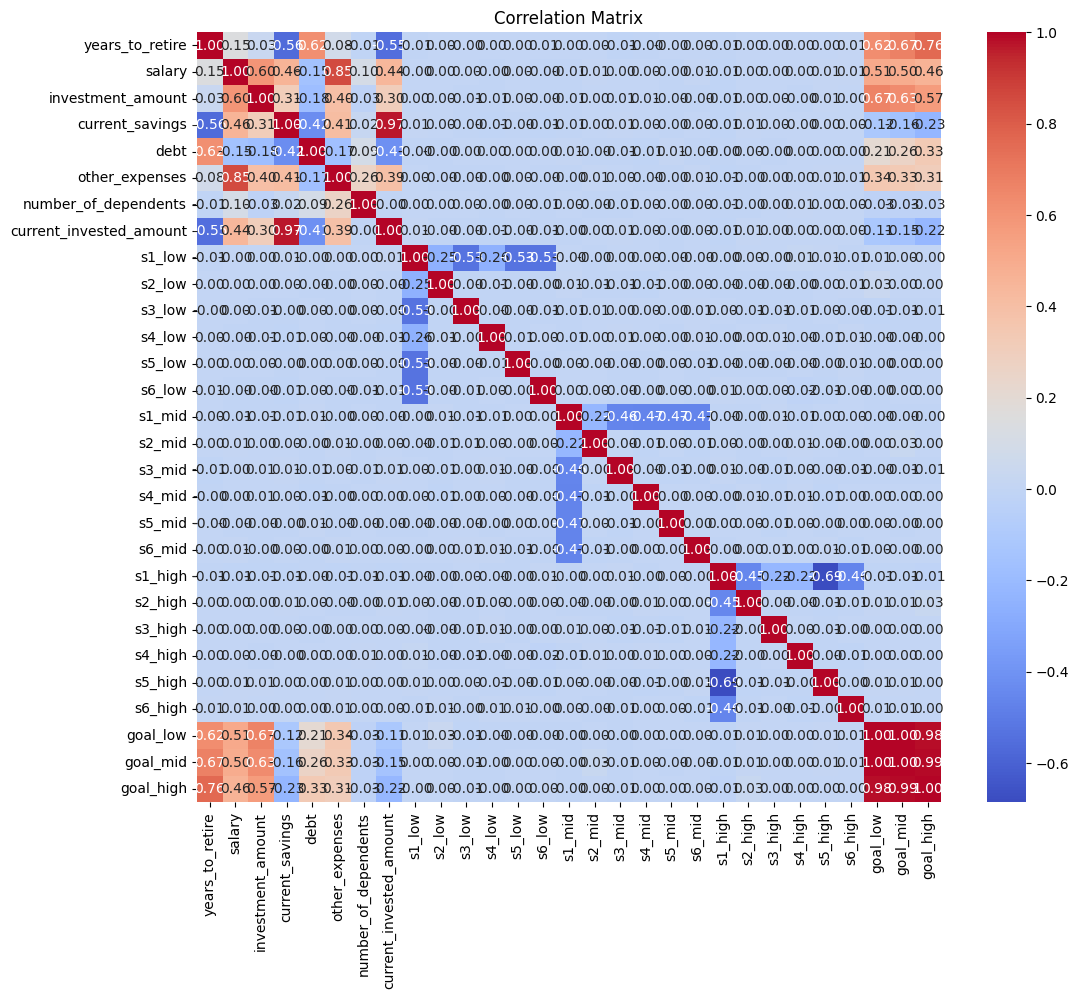

In [91]:
# Calculate correlation matrix excluding categorical columns
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


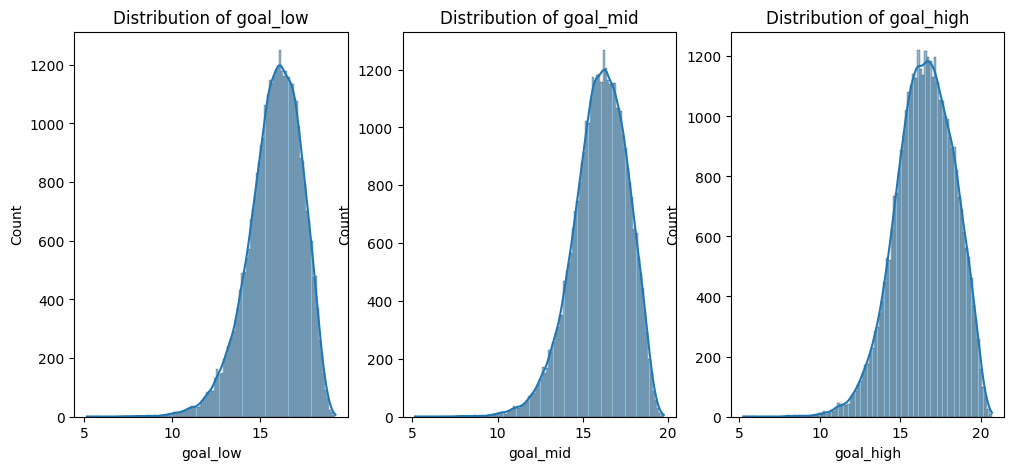

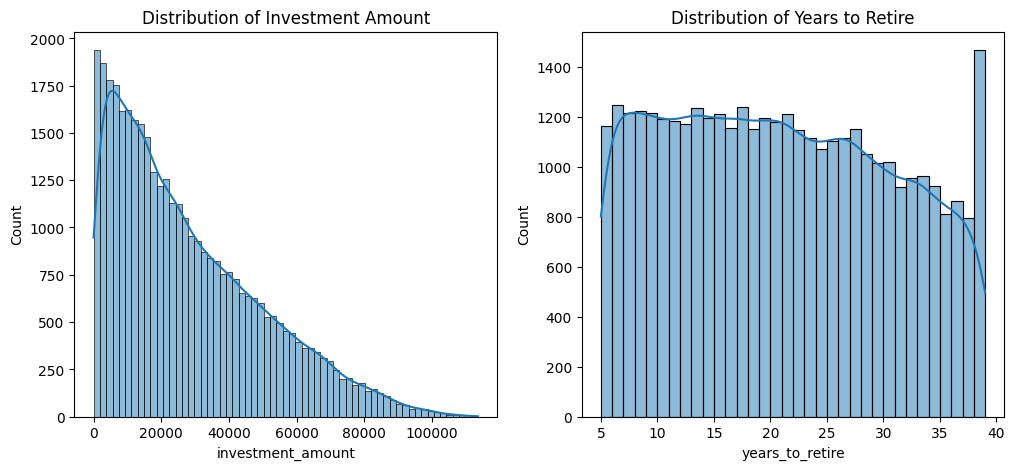

In [92]:
# Plot the distribution of the target variables
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.histplot(data[target_low], kde=True)
plt.title("Distribution of goal_low")

plt.subplot(1, 3, 2)
sns.histplot(data[target_mid], kde=True)
plt.title("Distribution of goal_mid")

plt.subplot(1, 3, 3)
sns.histplot(data[target_high], kde=True)
plt.title("Distribution of goal_high")

plt.show()

# Plot the distribution of important features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['investment_amount'], kde=True)
plt.title("Distribution of Investment Amount")

plt.subplot(1, 2, 2)
sns.histplot(data['years_to_retire'], kde=True)
plt.title("Distribution of Years to Retire")

plt.show()


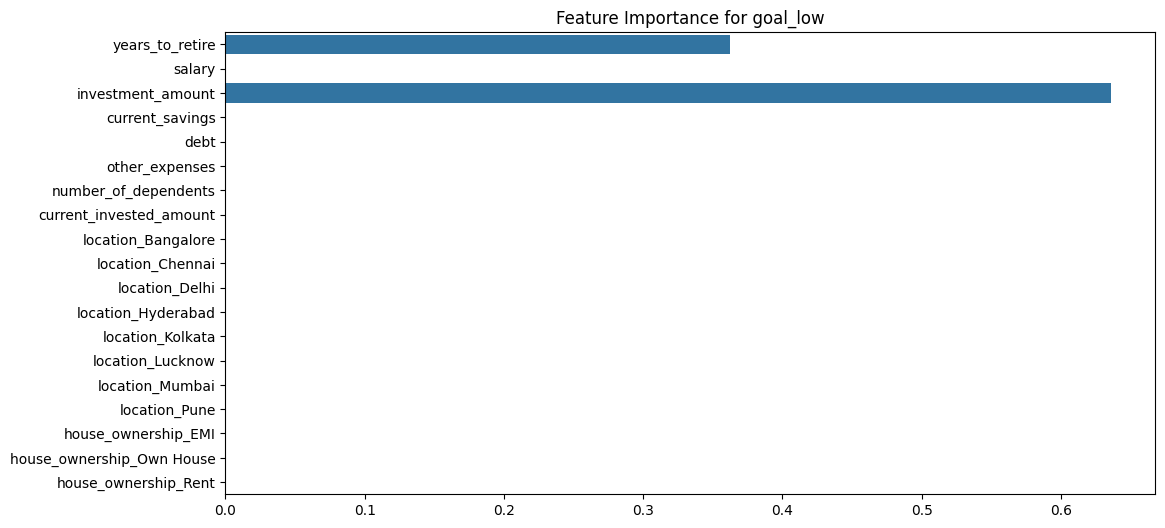

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Preprocessing categorical features
categorical_transformer = OneHotEncoder()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Transform the data
X_transformed = preprocessor.fit_transform(X)

# Train a RandomForest model to determine feature importance
rf_model = RandomForestRegressor()
rf_model.fit(X_transformed, y_low)

# Get feature importances
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(feature_names)
feature_importances = rf_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=all_feature_names)
plt.title("Feature Importance for goal_low")
plt.show()


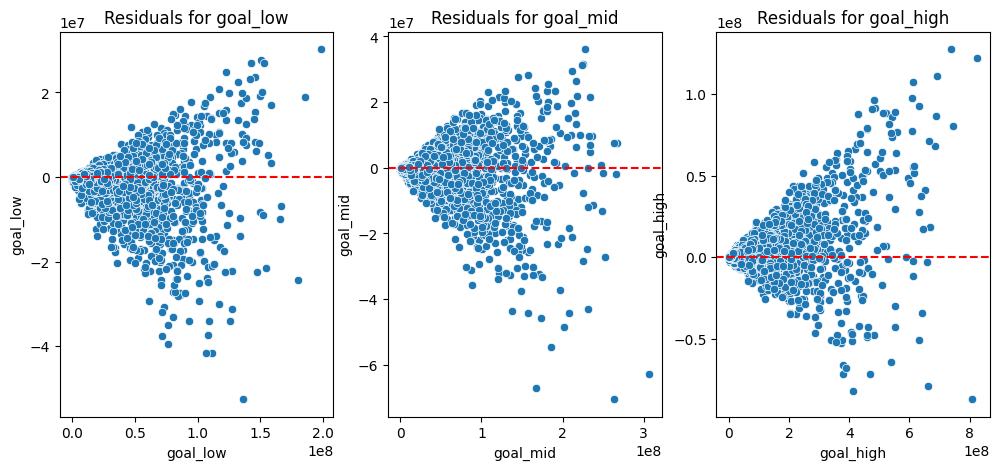

In [94]:
# Calculate residuals for the predictions
residuals_low = y_low_test - y_low_pred.flatten()
residuals_mid = y_mid_test - y_mid_pred.flatten()
residuals_high = y_high_test - y_high_pred.flatten()

# Plot residuals
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=y_low_test, y=residuals_low)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals for goal_low")

plt.subplot(1, 3, 2)
sns.scatterplot(x=y_mid_test, y=residuals_mid)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals for goal_mid")

plt.subplot(1, 3, 3)
sns.scatterplot(x=y_high_test, y=residuals_high)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals for goal_high")

plt.show()


In [132]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data
file_path = 'goal_amount.csv'
data = pd.read_csv(file_path)

# Filter out data with zero values for critical features
data = data[(data['investment_amount'] != 0) & 
            (data['years_to_retire'] != 0) & 
            (data['salary'] != 0)]

# Select relevant features and target variables
features = ['years_to_retire', 'investment_amount']
target_low = 'goal_low'
target_mid = 'goal_mid'
target_high = 'goal_high'

# Apply log transformation to the target variables
data[target_low] = np.log1p(data[target_low])
data[target_mid] = np.log1p(data[target_mid])
data[target_high] = np.log1p(data[target_high])

# Prepare the data
X = data[features]
y_low = data[target_low]
y_mid = data[target_mid]
y_high = data[target_high]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_low_train, y_low_test = train_test_split(X_scaled, y_low, test_size=0.2, random_state=42)
_, _, y_mid_train, y_mid_test = train_test_split(X_scaled, y_mid, test_size=0.2, random_state=42)
_, _, y_high_train, y_high_test = train_test_split(X_scaled, y_high, test_size=0.2, random_state=42)


In [133]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasRegressor

# Define the model function with parameters directly handled
def build_model(optimizer='adam', activation='relu', dropout_rate=0.2):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(64, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(16, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model


In [136]:
from sklearn.model_selection import GridSearchCV

# Create the KerasRegressor with fixed parameters
model = KerasRegressor(model=build_model, verbose=0)

# Define the parameter grid
param_grid = {
    'model__optimizer': ['adam', 'rmsprop'],
    'model__activation': ['relu', 'tanh', 'softmax'],
    'model__dropout_rate': [0.2, 0.3,],
    'batch_size': [32, 256],
    'epochs': [50, 150],
}

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# GridSearchCV for hyperparameter tuning
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)


In [137]:
from sklearn.metrics import mean_squared_error

# Function to train and evaluate the model
def train_evaluate(X_train, y_train, X_test, y_test):
    grid_result = grid.fit(X_train, y_train, validation_split=0.2, callbacks=[early_stopping])
    best_model = grid_result.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return best_model, y_pred, mse

# Train the model for goal_low
best_model_low, y_low_pred, mse_low = train_evaluate(X_train, y_low_train, X_test, y_low_test)

# Train the model for goal_mid
best_model_mid, y_mid_pred, mse_mid = train_evaluate(X_train, y_mid_train, X_test, y_mid_test)

# Train the model for goal_high
best_model_high, y_high_pred, mse_high = train_evaluate(X_train, y_high_train, X_test, y_high_test)

# Inverse log transformation for predictions and actual values
y_low_pred = np.expm1(y_low_pred)
y_mid_pred = np.expm1(y_mid_pred)
y_high_pred = np.expm1(y_high_pred)

y_low_test = np.expm1(y_low_test)
y_mid_test = np.expm1(y_mid_test)
y_high_test = np.expm1(y_high_test)

print(f'Mean Squared Error for goal_low (ANN with Log Transform): {mse_low}')
print(f'Mean Squared Error for goal_mid (ANN with Log Transform): {mse_mid}')
print(f'Mean Squared Error for goal_high (ANN with Log Transform): {mse_high}')


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Mean Squared Error for goal_low (ANN with Log Transform): 0.02071639586734445
Mean Squared Error for goal_mid (ANN with Log Transform): 0.01856923161127328
Mean Squared Error for goal_high (ANN with Log Transform): 0.01709425902507082


In [138]:
# Displaying a few predictions
predictions = pd.DataFrame({
    'investment_amount': X_test_full['investment_amount'],
    'years_to_retire': X_test_full['years_to_retire'],
    'goal_low_actual': y_low_test,
    'goal_low_predicted': y_low_pred.flatten(),
    'goal_mid_actual': y_mid_test,
    'goal_mid_predicted': y_mid_pred.flatten(),
    'goal_high_actual': y_high_test,
    'goal_high_predicted': y_high_pred.flatten()
}).head()

predictions

,investment_amount,years_to_retire,goal_low_actual,goal_low_predicted,goal_mid_actual,goal_mid_predicted,goal_high_actual,goal_high_predicted
36337,50874,12,"10,287,569.41","9,874,072.00","10,870,596.19","9,396,331.00","13,471,664.13","13,976,480.00"
48054,569,19,"236,223.00","213,653.75","263,566.29","161,482.30","382,411.14","248,216.81"
1599,33710,27,"28,989,314.90","27,209,940.00","31,924,944.63","33,303,806.00","61,793,753.37","66,058,928.00"
26048,17596,39,"32,718,763.21","39,543,740.00","50,586,089.91","67,697,736.00","168,314,893.17","164,938,224.00"
16051,20397,20,"9,089,949.03","9,652,112.00","10,811,200.76","10,113,069.00","16,607,051.98","16,761,799.00"


In [ ]:
# param_grid = {
#     'model__optimizer': ['adam', 'rmsprop', 'sgd', 'nadam'],
#     'model__activation': ['relu', 'tanh', 'softmax', 'selu'],
#     'model__dropout_rate': [0.2, 0.3, 0.4, 0.5],
#     'batch_size': [16, 32, 64, 128, 256],
#     'epochs': [50, 100, 150, 200],
#     'model__learning_rate': [0.01, 0.001, 0.0001],
# }
